In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [2]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "hidden_dim": [64, 128, 256, 512, 1024],
        "dropout": [0.1, 0.25, 0.5]
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 3*10**-3, n_epoch = 80, param_grid = param_grid)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"params.json", "w") as outfile: 
    json.dump({"param_grid": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, dropout: 0.1, 


  7%|▋         | 1/15 [02:56<41:16, 176.90s/it]

Scores: 20481.85, 14956.64, 17101.59, 14029.15; avg score: 16642.31
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 13%|█▎        | 2/15 [05:49<37:48, 174.47s/it]

Scores: 19094.92, 15082.71, 17403.81, 13884.89; avg score: 16366.58
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 20%|██        | 3/15 [08:42<34:43, 173.64s/it]

Scores: 19955.37, 15428.29, 17161.44, 14065.34; avg score: 16652.61
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


 27%|██▋       | 4/15 [11:34<31:45, 173.19s/it]

Scores: 19296.36, 14775.38, 17107.07, 12884.90; avg score: 16015.93
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 33%|███▎      | 5/15 [14:25<28:43, 172.38s/it]

Scores: 19961.78, 14954.33, 16870.36, 13743.25; avg score: 16382.43
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 40%|████      | 6/15 [17:15<25:42, 171.34s/it]

Scores: 19018.28, 14515.71, 16669.68, 12569.75; avg score: 15693.35
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 47%|████▋     | 7/15 [20:06<22:49, 171.21s/it]

Scores: 18684.69, 14652.70, 16852.35, 15977.82; avg score: 16541.89
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 53%|█████▎    | 8/15 [22:57<19:57, 171.14s/it]

Scores: 19870.04, 14387.21, 16914.61, 13210.81; avg score: 16095.67
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 60%|██████    | 9/15 [25:47<17:06, 171.06s/it]

Scores: 18866.03, 15240.61, 17027.76, 13723.56; avg score: 16214.49
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 67%|██████▋   | 10/15 [28:39<14:15, 171.08s/it]

Scores: 18652.51, 14389.65, 16719.96, 13047.83; avg score: 15702.49
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 73%|███████▎  | 11/15 [31:29<11:23, 170.78s/it]

Scores: 19728.17, 16056.95, 16970.06, 13197.42; avg score: 16488.15
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 80%|████████  | 12/15 [34:21<08:34, 171.34s/it]

Scores: 18614.11, 14207.58, 16876.54, 15435.83; avg score: 16283.51
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 87%|████████▋ | 13/15 [37:19<05:46, 173.41s/it]

Scores: 18696.20, 15008.36, 16813.58, 13170.26; avg score: 15922.10
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 93%|█████████▎| 14/15 [40:17<02:54, 174.82s/it]

Scores: 21252.58, 14552.13, 16497.82, 15296.00; avg score: 16899.63
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


100%|██████████| 15/15 [43:14<00:00, 172.94s/it]

Scores: 19504.82, 14795.50, 16726.01, 13849.48; avg score: 16218.95
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #2
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 512, dropout: 0.5, 


  7%|▋         | 1/15 [02:58<41:34, 178.18s/it]

Scores: 28303.71, 20332.23, 23859.40, 16546.30; avg score: 22260.41
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 13%|█▎        | 2/15 [05:56<38:38, 178.33s/it]

Scores: 28623.69, 20857.53, 24012.36, 19469.33; avg score: 23240.73
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 20%|██        | 3/15 [08:54<35:39, 178.31s/it]

Scores: 28068.32, 20676.17, 23661.89, 19702.96; avg score: 23027.33
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 27%|██▋       | 4/15 [11:53<32:41, 178.34s/it]

Scores: 28230.38, 20466.93, 23771.24, 17134.54; avg score: 22400.77
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 33%|███▎      | 5/15 [14:53<29:49, 178.92s/it]

Scores: 29023.17, 21369.97, 23771.93, 16968.37; avg score: 22783.36
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 40%|████      | 6/15 [17:49<26:43, 178.14s/it]

Scores: 27976.82, 21025.87, 24249.85, 16493.25; avg score: 22436.45
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 47%|████▋     | 7/15 [20:40<23:26, 175.84s/it]

Scores: 28589.04, 20434.37, 23393.12, 21784.01; avg score: 23550.13
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 53%|█████▎    | 8/15 [23:32<20:20, 174.36s/it]

Scores: 29416.92, 20378.76, 23351.62, 20739.23; avg score: 23471.63
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 60%|██████    | 9/15 [26:22<17:17, 172.98s/it]

Scores: 28355.04, 20343.40, 23643.81, 19727.03; avg score: 23017.32
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 67%|██████▋   | 10/15 [29:16<14:27, 173.40s/it]

Scores: 28271.01, 21073.28, 24144.78, 16634.18; avg score: 22530.81
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 73%|███████▎  | 11/15 [32:07<11:30, 172.59s/it]

Scores: 27840.04, 20545.39, 23632.34, 17122.51; avg score: 22285.07
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 80%|████████  | 12/15 [34:59<08:37, 172.54s/it]

Scores: 28138.55, 20688.39, 24131.10, 19421.27; avg score: 23094.83
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 87%|████████▋ | 13/15 [37:50<05:44, 172.13s/it]

Scores: 28283.66, 21047.52, 23910.64, 19393.00; avg score: 23158.70
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


 93%|█████████▎| 14/15 [40:45<02:52, 172.90s/it]

Scores: 28013.56, 21014.68, 23956.70, 16941.26; avg score: 22481.55
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


100%|██████████| 15/15 [43:38<00:00, 174.55s/it]

Scores: 27724.49, 20987.77, 23843.61, 17229.68; avg score: 22446.39
--------------------
Best params: {'hidden_dim': 512, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #3
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.5, 


  7%|▋         | 1/15 [02:52<40:16, 172.60s/it]

Scores: 32503.75, 23153.66, 25611.03, 23661.79; avg score: 26232.56
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 13%|█▎        | 2/15 [05:46<37:34, 173.42s/it]

Scores: 32592.88, 23657.44, 25871.30, 21684.30; avg score: 25951.48
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 20%|██        | 3/15 [08:40<34:41, 173.42s/it]

Scores: 33377.98, 22899.24, 25548.27, 20990.98; avg score: 25704.12
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 27%|██▋       | 4/15 [11:35<31:56, 174.24s/it]

Scores: 32417.27, 23662.41, 26114.07, 18412.59; avg score: 25151.58
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 33%|███▎      | 5/15 [14:27<28:54, 173.48s/it]

Scores: 31386.19, 23307.75, 25841.26, 21674.57; avg score: 25552.44
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 40%|████      | 6/15 [17:21<26:02, 173.60s/it]

Scores: 31113.71, 23265.45, 25965.00, 21110.24; avg score: 25363.60
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 47%|████▋     | 7/15 [20:15<23:09, 173.64s/it]

Scores: 31202.94, 23067.34, 25764.12, 18927.01; avg score: 24740.35
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 53%|█████▎    | 8/15 [23:08<20:15, 173.68s/it]

Scores: 32030.63, 23694.03, 25694.83, 22153.95; avg score: 25893.36
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 60%|██████    | 9/15 [26:02<17:21, 173.58s/it]

Scores: 31439.01, 23041.23, 25772.01, 21801.82; avg score: 25513.52
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 67%|██████▋   | 10/15 [28:54<14:26, 173.22s/it]

Scores: 32804.74, 23231.99, 25739.10, 19489.15; avg score: 25316.25
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


 73%|███████▎  | 11/15 [31:50<11:35, 173.97s/it]

Scores: 32674.22, 23161.68, 26013.12, 19464.67; avg score: 25328.42
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 80%|████████  | 12/15 [34:46<08:43, 174.56s/it]

Scores: 33783.29, 23795.54, 26359.48, 18685.76; avg score: 25656.02
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 87%|████████▋ | 13/15 [37:37<05:47, 173.67s/it]

Scores: 32106.56, 23345.69, 25817.08, 19145.29; avg score: 25103.66
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 93%|█████████▎| 14/15 [40:30<02:53, 173.22s/it]

Scores: 31715.36, 23302.10, 25498.00, 21784.10; avg score: 25574.89
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


100%|██████████| 15/15 [43:22<00:00, 173.51s/it]

Scores: 32282.42, 23124.85, 25672.95, 22896.56; avg score: 25994.19
--------------------
Best params: {'hidden_dim': 256, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #4
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.1, 


  7%|▋         | 1/15 [02:51<39:57, 171.24s/it]

Scores: 35264.04, 24680.66, 27022.55, 21142.91; avg score: 27027.54
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 13%|█▎        | 2/15 [05:45<37:29, 173.02s/it]

Scores: 36876.74, 24908.59, 26830.71, 19344.55; avg score: 26990.15
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 20%|██        | 3/15 [08:38<34:34, 172.84s/it]

Scores: 34905.65, 25011.23, 26839.68, 18733.03; avg score: 26372.40
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 27%|██▋       | 4/15 [11:30<31:38, 172.61s/it]

Scores: 32988.11, 24497.34, 26357.59, 21902.38; avg score: 26436.35
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 33%|███▎      | 5/15 [14:23<28:47, 172.76s/it]

Scores: 33999.77, 24494.02, 26919.50, 20675.49; avg score: 26522.20
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 40%|████      | 6/15 [17:15<25:53, 172.66s/it]

Scores: 34830.00, 24573.74, 26615.53, 20160.14; avg score: 26544.85
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 47%|████▋     | 7/15 [20:08<23:01, 172.74s/it]

Scores: 33858.74, 25040.92, 26964.38, 20103.68; avg score: 26491.93
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 53%|█████▎    | 8/15 [23:01<20:08, 172.64s/it]

Scores: 33526.41, 24288.43, 26399.27, 22480.23; avg score: 26673.58
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 60%|██████    | 9/15 [25:52<17:13, 172.28s/it]

Scores: 33685.48, 24197.05, 26825.00, 24462.76; avg score: 27292.57
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 67%|██████▋   | 10/15 [28:44<14:20, 172.03s/it]

Scores: 34451.69, 24344.02, 26462.13, 24169.88; avg score: 27356.93
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 73%|███████▎  | 11/15 [31:39<11:31, 172.93s/it]

Scores: 33654.72, 25509.62, 27218.71, 23567.71; avg score: 27487.69
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 80%|████████  | 12/15 [34:32<08:38, 172.91s/it]

Scores: 35277.10, 25681.27, 27859.74, 25678.26; avg score: 28624.09
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 87%|████████▋ | 13/15 [37:24<05:45, 172.90s/it]

Scores: 35885.62, 24748.47, 27099.99, 24205.86; avg score: 27984.99
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 93%|█████████▎| 14/15 [40:17<02:52, 172.91s/it]

Scores: 35066.54, 24540.23, 27147.93, 22533.67; avg score: 27322.09
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


100%|██████████| 15/15 [43:12<00:00, 172.82s/it]

Scores: 36540.72, 24580.64, 26779.91, 22764.47; avg score: 27666.44
--------------------
Best params: {'hidden_dim': 512, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #5
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 1024, dropout: 0.5, 


  7%|▋         | 1/15 [02:55<40:55, 175.42s/it]

Scores: 37291.75, 26842.43, 28739.86, 23400.76; avg score: 29068.70
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 13%|█▎        | 2/15 [05:48<37:42, 174.00s/it]

Scores: 36892.55, 25880.01, 28322.41, 21630.17; avg score: 28181.28
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 20%|██        | 3/15 [08:41<34:42, 173.57s/it]

Scores: 36326.97, 26347.77, 28611.19, 22237.98; avg score: 28380.98
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 27%|██▋       | 4/15 [11:34<31:48, 173.50s/it]

Scores: 36792.54, 27327.03, 28895.16, 23223.29; avg score: 29059.51
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 33%|███▎      | 5/15 [14:25<28:46, 172.62s/it]

Scores: 37245.47, 26560.63, 28915.06, 19955.27; avg score: 28169.11
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 40%|████      | 6/15 [17:17<25:49, 172.14s/it]

Scores: 36916.04, 26041.87, 28490.17, 24050.17; avg score: 28874.56
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 47%|████▋     | 7/15 [20:09<22:56, 172.05s/it]

Scores: 37321.75, 26141.34, 28758.80, 21271.75; avg score: 28373.41
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 53%|█████▎    | 8/15 [23:01<20:05, 172.22s/it]

Scores: 38854.28, 26355.55, 29216.36, 20937.50; avg score: 28840.92
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 60%|██████    | 9/15 [25:54<17:14, 172.35s/it]

Scores: 37362.06, 26514.17, 28643.77, 30102.28; avg score: 30655.57
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 67%|██████▋   | 10/15 [28:45<14:20, 172.03s/it]

Scores: 37356.28, 26090.44, 28519.08, 21254.14; avg score: 28304.99
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 73%|███████▎  | 11/15 [31:38<11:29, 172.28s/it]

Scores: 37485.32, 26390.53, 28930.04, 20054.89; avg score: 28215.20
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 80%|████████  | 12/15 [34:33<08:39, 173.03s/it]

Scores: 37923.39, 26854.29, 29067.94, 20635.45; avg score: 28620.27
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 87%|████████▋ | 13/15 [37:25<05:45, 172.91s/it]

Scores: 36172.05, 26159.37, 28506.18, 21306.08; avg score: 28035.92
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 93%|█████████▎| 14/15 [40:18<02:52, 172.86s/it]

Scores: 39270.61, 26473.62, 28830.08, 20868.25; avg score: 28860.64
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


100%|██████████| 15/15 [43:13<00:00, 172.87s/it]

Scores: 37542.23, 26761.01, 29616.86, 20326.83; avg score: 28561.73
--------------------
Best params: {'hidden_dim': 256, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #6
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, dropout: 0.5, 


  7%|▋         | 1/15 [02:53<40:25, 173.27s/it]

Scores: 37905.45, 26729.32, 29902.20, 24299.29; avg score: 29709.06
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 13%|█▎        | 2/15 [05:45<37:21, 172.40s/it]

Scores: 38208.65, 26728.11, 30009.80, 24146.71; avg score: 29773.32
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 20%|██        | 3/15 [08:39<34:42, 173.55s/it]

Scores: 39766.23, 27777.70, 29922.20, 21905.74; avg score: 29842.97
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 27%|██▋       | 4/15 [11:32<31:42, 172.96s/it]

Scores: 37480.95, 26882.61, 29184.72, 25859.92; avg score: 29852.05
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 33%|███▎      | 5/15 [14:24<28:48, 172.80s/it]

Scores: 38915.25, 26812.23, 29376.84, 23563.85; avg score: 29667.04
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 40%|████      | 6/15 [17:19<26:02, 173.57s/it]

Scores: 39513.54, 27098.41, 30975.10, 21725.61; avg score: 29828.16
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 47%|████▋     | 7/15 [20:11<23:04, 173.01s/it]

Scores: 37241.47, 26795.69, 29653.38, 26524.54; avg score: 30053.77
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 53%|█████▎    | 8/15 [23:04<20:11, 173.11s/it]

Scores: 39042.03, 27167.75, 29795.79, 23981.09; avg score: 29996.66
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 60%|██████    | 9/15 [25:57<17:17, 172.85s/it]

Scores: 37386.38, 26772.11, 29820.71, 20144.66; avg score: 28530.97
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


 67%|██████▋   | 10/15 [28:52<14:27, 173.49s/it]

Scores: 39568.76, 27190.09, 30632.23, 22110.37; avg score: 29875.36
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 73%|███████▎  | 11/15 [31:45<11:33, 173.48s/it]

Scores: 40373.66, 26888.08, 29760.33, 22425.17; avg score: 29861.81
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 80%|████████  | 12/15 [34:38<08:40, 173.46s/it]

Scores: 39457.55, 26900.50, 30986.21, 22199.69; avg score: 29885.99
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 87%|████████▋ | 13/15 [37:30<05:46, 173.00s/it]

Scores: 38157.39, 27205.62, 30542.62, 23451.36; avg score: 29839.25
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 93%|█████████▎| 14/15 [40:24<02:53, 173.15s/it]

Scores: 38001.82, 26682.40, 29722.13, 22690.01; avg score: 29274.09
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


100%|██████████| 15/15 [43:17<00:00, 173.18s/it]

Scores: 39136.66, 27280.49, 29831.14, 21380.34; avg score: 29407.16
--------------------
Best params: {'hidden_dim': 64, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #7
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.1, 


  7%|▋         | 1/15 [02:52<40:12, 172.36s/it]

Scores: 38331.40, 27556.07, 29926.54, 22765.56; avg score: 29644.89
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 13%|█▎        | 2/15 [05:44<37:20, 172.36s/it]

Scores: 37882.61, 27028.62, 30182.53, 24656.15; avg score: 29937.48
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 20%|██        | 3/15 [08:38<34:36, 173.08s/it]

Scores: 39179.11, 27386.06, 30045.38, 21985.12; avg score: 29648.92
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 27%|██▋       | 4/15 [11:34<31:54, 174.03s/it]

Scores: 42006.74, 29206.13, 30895.20, 24264.82; avg score: 31593.22
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


 33%|███▎      | 5/15 [14:28<29:01, 174.12s/it]

Scores: 39068.11, 28188.22, 30416.36, 21084.00; avg score: 29689.17
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 40%|████      | 6/15 [17:20<26:00, 173.42s/it]

Scores: 38214.39, 26982.51, 29974.53, 24349.38; avg score: 29880.20
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 47%|████▋     | 7/15 [20:12<23:04, 173.12s/it]

Scores: 38225.49, 27440.95, 30264.60, 25579.15; avg score: 30377.55
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 53%|█████▎    | 8/15 [23:07<20:15, 173.60s/it]

Scores: 39295.98, 28222.41, 30829.90, 27066.09; avg score: 31353.60
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 60%|██████    | 9/15 [26:00<17:20, 173.36s/it]

Scores: 38610.36, 27223.07, 30537.46, 22382.97; avg score: 29688.47
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 67%|██████▋   | 10/15 [28:55<14:29, 173.80s/it]

Scores: 39740.91, 27810.66, 30291.05, 21972.80; avg score: 29953.86
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 73%|███████▎  | 11/15 [31:50<11:36, 174.16s/it]

Scores: 39995.71, 27892.35, 31470.06, 24140.62; avg score: 30874.69
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 80%|████████  | 12/15 [34:43<08:41, 173.85s/it]

Scores: 38060.46, 27247.88, 30074.96, 25848.78; avg score: 30308.02
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 87%|████████▋ | 13/15 [37:39<05:49, 174.57s/it]

Scores: 40370.51, 28139.98, 30497.58, 25898.74; avg score: 31226.70
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 93%|█████████▎| 14/15 [40:34<02:54, 174.61s/it]

Scores: 39956.32, 27344.64, 30437.58, 26919.94; avg score: 31164.62
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


100%|██████████| 15/15 [43:28<00:00, 173.89s/it]

Scores: 38638.20, 27298.39, 30606.27, 23412.55; avg score: 29988.86
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #8
----------------------------------------



  0%|          | 0/15 [00:00<?, ?it/s]

hyperparams: hidden_dim: 64, dropout: 0.1, 


  7%|▋         | 1/15 [02:52<40:18, 172.78s/it]

Scores: 38986.45, 27838.95, 30317.73, 25315.79; avg score: 30614.73
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 13%|█▎        | 2/15 [05:47<37:37, 173.66s/it]

Scores: 39547.53, 27977.53, 30660.33, 24219.70; avg score: 30601.27
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 20%|██        | 3/15 [08:40<34:45, 173.77s/it]

Scores: 39817.53, 27956.75, 30220.42, 22341.23; avg score: 30083.98
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 27%|██▋       | 4/15 [11:33<31:46, 173.29s/it]

Scores: 38486.40, 27591.74, 30430.08, 30896.76; avg score: 31851.24
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 33%|███▎      | 5/15 [14:26<28:50, 173.05s/it]

Scores: 38259.81, 27364.74, 30276.76, 22060.03; avg score: 29490.33
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.25, 


 40%|████      | 6/15 [17:22<26:06, 174.08s/it]

Scores: 40229.10, 27868.52, 30620.85, 22065.26; avg score: 30195.93
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.1, 


 47%|████▋     | 7/15 [20:18<23:18, 174.75s/it]

Scores: 44513.30, 27919.19, 30752.91, 24714.71; avg score: 31975.03
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 53%|█████▎    | 8/15 [23:15<20:28, 175.45s/it]

Scores: 38315.96, 27560.57, 30540.63, 21866.26; avg score: 29570.85
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 60%|██████    | 9/15 [26:10<17:32, 175.45s/it]

Scores: 38479.75, 27835.79, 30658.44, 24205.17; avg score: 30294.79
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 67%|██████▋   | 10/15 [29:03<14:33, 174.77s/it]

Scores: 38556.92, 28047.58, 29963.11, 23194.81; avg score: 29940.60
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 73%|███████▎  | 11/15 [31:57<11:37, 174.27s/it]

Scores: 39908.47, 28276.20, 30435.88, 22846.05; avg score: 30366.65
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 80%|████████  | 12/15 [34:48<08:40, 173.51s/it]

Scores: 38107.91, 27325.45, 30457.60, 30435.49; avg score: 31581.61
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 87%|████████▋ | 13/15 [37:42<05:47, 173.59s/it]

Scores: 39650.14, 28248.06, 30387.50, 22605.61; avg score: 30222.83
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 93%|█████████▎| 14/15 [40:34<02:53, 173.03s/it]

Scores: 38036.29, 27144.14, 30166.73, 25637.90; avg score: 30246.27
--------------------
hyperparams: hidden_dim: 1024, dropout: 0.5, 


100%|██████████| 15/15 [43:29<00:00, 173.95s/it]

Scores: 38819.99, 27910.54, 30701.04, 24949.33; avg score: 30595.23
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.5}
----------------------------------------


In [3]:
best_model_params

[{'hidden_dim': 128, 'dropout': 0.5},
 {'hidden_dim': 512, 'dropout': 0.5},
 {'hidden_dim': 256, 'dropout': 0.5},
 {'hidden_dim': 512, 'dropout': 0.5},
 {'hidden_dim': 256, 'dropout': 0.25},
 {'hidden_dim': 64, 'dropout': 0.1},
 {'hidden_dim': 128, 'dropout': 0.1},
 {'hidden_dim': 128, 'dropout': 0.5}]

In [6]:
## Multiple model training
cfg = get_config()
num_models = 8

for k in range(1, num_models+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['num_epochs'] = 80

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in param_grid.keys():
        cfg[param_name] = best_model_params[k-1][param_name]
        
    model = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 267.17it/s, step_loss=7502.804] 


Training loss of epoch 0: 27193.011475389376


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 0: 22492.982421875


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 274.28it/s, step_loss=14357.964]


Training loss of epoch 1: 20242.529240714855


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 1: 18795.23828125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 284.62it/s, step_loss=20774.791]


Training loss of epoch 2: 18141.219435621755


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 2: 16979.578125


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 276.98it/s, step_loss=6857.999] 


Training loss of epoch 3: 16964.737459907898


100%|██████████| 14/14 [00:00<00:00, 215.97it/s]


Validation loss of epoch 3: 15890.927734375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 284.15it/s, step_loss=12592.055]


Training loss of epoch 4: 16497.25122616314


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 4: 15796.7470703125


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 282.16it/s, step_loss=16151.379]


Training loss of epoch 5: 16165.4403126872


100%|██████████| 14/14 [00:00<00:00, 292.24it/s]


Validation loss of epoch 5: 14925.32421875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 279.90it/s, step_loss=19893.229]


Training loss of epoch 6: 15902.016529802317


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 6: 14640.044921875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 281.30it/s, step_loss=38796.855]


Training loss of epoch 7: 15803.519867430861


100%|██████████| 14/14 [00:00<00:00, 226.41it/s]


Validation loss of epoch 7: 14392.890625


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 277.09it/s, step_loss=17738.336]


Training loss of epoch 8: 15615.661646053813


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 8: 14162.5791015625


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 286.41it/s, step_loss=10857.793]


Training loss of epoch 9: 15574.833972674971


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 9: 14733.970703125


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 278.26it/s, step_loss=19068.334]


Training loss of epoch 10: 15454.623029714956


100%|██████████| 14/14 [00:00<00:00, 311.96it/s]


Validation loss of epoch 10: 14059.01171875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 276.66it/s, step_loss=2428.691] 


Training loss of epoch 11: 15404.315653548074


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 11: 14262.734375


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 282.81it/s, step_loss=21819.273]


Training loss of epoch 12: 15339.09578892522


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 12: 13967.6494140625


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 276.21it/s, step_loss=17225.633]


Training loss of epoch 13: 15266.957606891474


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 13: 14066.88671875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 275.52it/s, step_loss=8828.772] 


Training loss of epoch 14: 15299.748294915635


100%|██████████| 14/14 [00:00<00:00, 222.81it/s]


Validation loss of epoch 14: 14000.939453125


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 266.43it/s, step_loss=15962.125]


Training loss of epoch 15: 15134.816002988968


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 15: 13971.1875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 277.30it/s, step_loss=22286.057]


Training loss of epoch 16: 15194.606841553514


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 16: 13793.8330078125


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 274.28it/s, step_loss=27764.441]


Training loss of epoch 17: 15116.718892740366


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 17: 13824.994140625


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 272.28it/s, step_loss=31062.719]


Training loss of epoch 18: 15082.285199930111


100%|██████████| 14/14 [00:00<00:00, 269.80it/s]


Validation loss of epoch 18: 13756.1943359375


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 273.63it/s, step_loss=14484.264]


Training loss of epoch 19: 15111.907054962061


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 19: 14043.73828125


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 284.29it/s, step_loss=22567.010]


Training loss of epoch 20: 15064.410401950629


100%|██████████| 14/14 [00:00<00:00, 282.81it/s]


Validation loss of epoch 20: 13850.404296875


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 277.73it/s, step_loss=8579.271] 


Training loss of epoch 21: 14960.194508317942


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 21: 13710.638671875


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 275.11it/s, step_loss=21357.479]


Training loss of epoch 22: 15082.851266099242


100%|██████████| 14/14 [00:00<00:00, 298.50it/s]


Validation loss of epoch 22: 13616.529296875


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 293.23it/s, step_loss=32878.051]


Training loss of epoch 23: 14967.569973979133


100%|██████████| 14/14 [00:00<00:00, 379.38it/s]


Validation loss of epoch 23: 13724.6640625


Processing Epoch 24: 100%|██████████| 626/626 [00:01<00:00, 333.02it/s, step_loss=12068.708]


Training loss of epoch 24: 14934.423301623652


100%|██████████| 14/14 [00:00<00:00, 438.66it/s]


Validation loss of epoch 24: 13848.7197265625


Processing Epoch 25: 100%|██████████| 626/626 [00:01<00:00, 335.66it/s, step_loss=6143.928] 


Training loss of epoch 25: 14967.27917207468


100%|██████████| 14/14 [00:00<00:00, 425.38it/s]


Validation loss of epoch 25: 13898.96875


Processing Epoch 26: 100%|██████████| 626/626 [00:01<00:00, 340.85it/s, step_loss=10374.740]


Training loss of epoch 26: 14890.75678913738


100%|██████████| 14/14 [00:00<00:00, 412.87it/s]


Validation loss of epoch 26: 13703.275390625


Processing Epoch 27: 100%|██████████| 626/626 [00:01<00:00, 340.39it/s, step_loss=3801.037] 


Training loss of epoch 27: 14922.284966319514


100%|██████████| 14/14 [00:00<00:00, 452.33it/s]


Validation loss of epoch 27: 13694.0302734375


Processing Epoch 28: 100%|██████████| 626/626 [00:01<00:00, 347.86it/s, step_loss=6051.752] 


Training loss of epoch 28: 14905.446213402307


100%|██████████| 14/14 [00:00<00:00, 425.38it/s]


Validation loss of epoch 28: 13635.0869140625


Processing Epoch 29: 100%|██████████| 626/626 [00:01<00:00, 337.30it/s, step_loss=3542.010] 


Training loss of epoch 29: 14842.95014422237


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 29: 13734.0478515625


Processing Epoch 30: 100%|██████████| 626/626 [00:01<00:00, 323.44it/s, step_loss=7792.617] 


Training loss of epoch 30: 14871.523602860423


100%|██████████| 14/14 [00:00<00:00, 311.96it/s]


Validation loss of epoch 30: 13576.4052734375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 311.68it/s, step_loss=14565.739]


Training loss of epoch 31: 14804.368593843601


100%|██████████| 14/14 [00:00<00:00, 369.41it/s]


Validation loss of epoch 31: 13703.732421875


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 297.23it/s, step_loss=2851.176] 


Training loss of epoch 32: 14817.920531836562


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 32: 13577.23046875


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 290.08it/s, step_loss=32088.604]


Training loss of epoch 33: 14820.432461967102


100%|██████████| 14/14 [00:00<00:00, 342.16it/s]


Validation loss of epoch 33: 13493.85546875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 288.31it/s, step_loss=14484.913]


Training loss of epoch 34: 14768.193481055312


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 34: 13599.3857421875


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 289.96it/s, step_loss=10537.541]


Training loss of epoch 35: 14829.236869446386


100%|██████████| 14/14 [00:00<00:00, 230.12it/s]


Validation loss of epoch 35: 13553.2314453125


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 290.39it/s, step_loss=13062.651]


Training loss of epoch 36: 14734.755421013877


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 36: 13517.49609375


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 289.11it/s, step_loss=24929.635]


Training loss of epoch 37: 14754.730578730281


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 37: 13479.083984375


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 289.09it/s, step_loss=3554.369] 


Training loss of epoch 38: 14685.548221673447


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 38: 13400.7294921875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 291.02it/s, step_loss=10037.104]


Training loss of epoch 39: 14650.399266642122


100%|██████████| 14/14 [00:00<00:00, 333.98it/s]


Validation loss of epoch 39: 13417.86328125


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 289.12it/s, step_loss=20247.223]


Training loss of epoch 40: 14703.793826752197


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 40: 13472.21875


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 293.22it/s, step_loss=16164.743]


Training loss of epoch 41: 14691.543006190095


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 41: 13520.951171875


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 289.83it/s, step_loss=8585.089] 


Training loss of epoch 42: 14606.059022751098


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 42: 13484.73828125


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 291.10it/s, step_loss=10237.272]


Training loss of epoch 43: 14630.709307295827


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 43: 13567.2470703125


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 292.73it/s, step_loss=11189.861]


Training loss of epoch 44: 14650.985759503545


100%|██████████| 14/14 [00:00<00:00, 342.13it/s]


Validation loss of epoch 44: 13493.107421875


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 291.02it/s, step_loss=12968.717]


Training loss of epoch 45: 14594.011778810154


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 45: 13420.25390625


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 289.73it/s, step_loss=28696.264]


Training loss of epoch 46: 14512.293481991313


100%|██████████| 14/14 [00:00<00:00, 369.42it/s]


Validation loss of epoch 46: 13478.162109375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 290.34it/s, step_loss=7981.240] 


Training loss of epoch 47: 14592.649994383986


100%|██████████| 14/14 [00:00<00:00, 350.92it/s]


Validation loss of epoch 47: 13497.6640625


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 288.51it/s, step_loss=10519.887]


Training loss of epoch 48: 14591.929401239267


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 48: 13514.2236328125


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 283.51it/s, step_loss=11341.896]


Training loss of epoch 49: 14542.303789717702


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 49: 13471.712890625


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 289.71it/s, step_loss=9963.857] 


Training loss of epoch 50: 14603.966954435404


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 50: 13539.052734375


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 285.74it/s, step_loss=23536.223]


Training loss of epoch 51: 14548.537074274911


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 51: 13461.1689453125


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 286.92it/s, step_loss=9940.991] 


Training loss of epoch 52: 14526.963850807459


100%|██████████| 14/14 [00:00<00:00, 350.68it/s]


Validation loss of epoch 52: 13536.76171875


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 289.09it/s, step_loss=14113.066]


Training loss of epoch 53: 14548.495833229334


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 53: 13522.1083984375


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 288.18it/s, step_loss=22477.459]


Training loss of epoch 54: 14528.661591453674


100%|██████████| 14/14 [00:00<00:00, 298.56it/s]


Validation loss of epoch 54: 13415.2724609375


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 287.51it/s, step_loss=9335.716] 


Training loss of epoch 55: 14480.582040610025


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 55: 13472.79296875


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 291.19it/s, step_loss=37725.230]


Training loss of epoch 56: 14389.923196323383


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 56: 13300.0859375


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 286.55it/s, step_loss=10006.708]


Training loss of epoch 57: 14427.207977392422


100%|██████████| 14/14 [00:00<00:00, 304.94it/s]


Validation loss of epoch 57: 13318.4599609375


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 285.39it/s, step_loss=16720.457]


Training loss of epoch 58: 14562.43183172549


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 58: 13449.791015625


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 282.91it/s, step_loss=15270.592]


Training loss of epoch 59: 14445.474629655051


100%|██████████| 14/14 [00:00<00:00, 342.15it/s]


Validation loss of epoch 59: 13514.689453125


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 288.58it/s, step_loss=21768.498]


Training loss of epoch 60: 14354.209620076628


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 60: 13405.744140625


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 287.22it/s, step_loss=9112.016] 


Training loss of epoch 61: 14412.72045274436


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 61: 13343.814453125


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=25919.479]


Training loss of epoch 62: 14381.525541165385


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 62: 13470.791015625


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 286.64it/s, step_loss=33603.469]


Training loss of epoch 63: 14379.531771821335


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 63: 13354.943359375


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 287.23it/s, step_loss=6287.844] 


Training loss of epoch 64: 14399.26169534994


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 64: 13568.8251953125


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 286.62it/s, step_loss=14462.037]


Training loss of epoch 65: 14313.795961617661


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 65: 13478.99609375


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 291.08it/s, step_loss=6831.209] 


Training loss of epoch 66: 14340.107799395966


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 66: 13313.0185546875


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 285.49it/s, step_loss=29489.807]


Training loss of epoch 67: 14349.836109100439


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 67: 13388.1201171875


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 287.29it/s, step_loss=10861.294]


Training loss of epoch 68: 14321.84982075554


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 68: 13368.916015625


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 289.50it/s, step_loss=18421.688]


Training loss of epoch 69: 14227.878701109476


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 69: 13408.421875


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 289.36it/s, step_loss=18428.021]


Training loss of epoch 70: 14250.669209733176


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 70: 13283.36328125


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 287.28it/s, step_loss=6678.727] 


Training loss of epoch 71: 14318.818069214258


100%|██████████| 14/14 [00:00<00:00, 189.70it/s]


Validation loss of epoch 71: 13478.880859375


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 285.46it/s, step_loss=4767.905] 


Training loss of epoch 72: 14298.110419422674


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 72: 13487.6376953125


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 288.54it/s, step_loss=9282.534] 


Training loss of epoch 73: 14241.439799445887


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 73: 13350.451171875


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 288.49it/s, step_loss=24219.488]


Training loss of epoch 74: 14346.145541352585


100%|██████████| 14/14 [00:00<00:00, 369.41it/s]


Validation loss of epoch 74: 13498.6328125


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 290.38it/s, step_loss=10556.335]


Training loss of epoch 75: 14207.188719923122


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 75: 13383.0869140625


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 288.96it/s, step_loss=4789.104] 


Training loss of epoch 76: 14266.36269936851


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 76: 13326.0859375


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 286.30it/s, step_loss=42270.410]


Training loss of epoch 77: 14229.96939428165


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 77: 13243.638671875


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 288.16it/s, step_loss=21556.812]


Training loss of epoch 78: 14262.0321095622


100%|██████████| 14/14 [00:00<00:00, 233.95it/s]


Validation loss of epoch 78: 13402.130859375


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 288.90it/s, step_loss=6851.026] 


Training loss of epoch 79: 14187.740412995458


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 79: 13264.5087890625
--------------------
MODEL TRAINING - #2
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 279.00it/s, step_loss=88133.055]


Training loss of epoch 0: 26491.874366638378


100%|██████████| 14/14 [00:00<00:00, 304.98it/s]


Validation loss of epoch 0: 22076.6875


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 273.90it/s, step_loss=5921.575] 


Training loss of epoch 1: 22076.96415266823


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 1: 20720.30078125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 275.15it/s, step_loss=30361.467]


Training loss of epoch 2: 21379.7673831245


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 2: 20234.298828125


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 274.24it/s, step_loss=24045.129]


Training loss of epoch 3: 21069.730654390474


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 3: 20357.619140625


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 276.47it/s, step_loss=13037.153]


Training loss of epoch 4: 20832.247224752897


100%|██████████| 14/14 [00:00<00:00, 255.11it/s]


Validation loss of epoch 4: 20586.619140625


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 275.17it/s, step_loss=71964.602]


Training loss of epoch 5: 20711.48633592502


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 5: 19973.30078125


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 269.29it/s, step_loss=5671.157] 


Training loss of epoch 6: 20586.753545109077


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 6: 19989.19921875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 273.04it/s, step_loss=14919.603]


Training loss of epoch 7: 20364.583232453075


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 7: 19485.79296875


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 273.99it/s, step_loss=17402.602]


Training loss of epoch 8: 20296.70222175769


100%|██████████| 14/14 [00:00<00:00, 305.18it/s]


Validation loss of epoch 8: 19654.955078125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 276.07it/s, step_loss=11376.170]


Training loss of epoch 9: 20162.6692183132


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 9: 19638.41015625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 275.70it/s, step_loss=11383.143]


Training loss of epoch 10: 20079.58809810553


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 10: 19951.482421875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 274.56it/s, step_loss=6350.150] 


Training loss of epoch 11: 20032.965983332917


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 11: 19492.671875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 277.43it/s, step_loss=27268.645]


Training loss of epoch 12: 19921.67163319938


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 12: 19435.720703125


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 276.41it/s, step_loss=16336.936]


Training loss of epoch 13: 19915.992955021964


100%|██████████| 14/14 [00:00<00:00, 286.32it/s]


Validation loss of epoch 13: 19441.296875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 276.09it/s, step_loss=10653.592]


Training loss of epoch 14: 19862.565768208366


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 14: 19342.275390625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 273.78it/s, step_loss=24653.992]


Training loss of epoch 15: 19865.241713258787


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 15: 19401.556640625


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 276.18it/s, step_loss=23443.412]


Training loss of epoch 16: 19745.96518383087


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 16: 19940.6328125


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 274.21it/s, step_loss=23310.254]


Training loss of epoch 17: 19767.68181690545


100%|██████████| 14/14 [00:00<00:00, 298.49it/s]


Validation loss of epoch 17: 19509.02734375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 276.41it/s, step_loss=2685.375] 


Training loss of epoch 18: 19618.090905332716


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 18: 19377.638671875


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 271.35it/s, step_loss=7770.775] 


Training loss of epoch 19: 19652.29312787041


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 19: 19252.55859375


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 253.39it/s, step_loss=8629.758] 


Training loss of epoch 20: 19513.966987195487


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 20: 19297.564453125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 261.55it/s, step_loss=8568.852] 


Training loss of epoch 21: 19540.0732031874


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 21: 19283.794921875


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 257.26it/s, step_loss=27460.623]


Training loss of epoch 22: 19553.854340867114


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 22: 19250.802734375


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 256.84it/s, step_loss=25707.391]


Training loss of epoch 23: 19479.464497429115


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 23: 19287.61328125


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 256.91it/s, step_loss=16436.354]


Training loss of epoch 24: 19418.215279771117


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 24: 19522.451171875


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 258.86it/s, step_loss=16990.777]


Training loss of epoch 25: 19324.87537908097


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 25: 19540.39453125


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 253.71it/s, step_loss=23192.098]


Training loss of epoch 26: 19355.512197671225


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 26: 19160.26171875


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 252.18it/s, step_loss=19169.855]


Training loss of epoch 27: 19247.326271715254


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 27: 19276.703125


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 259.30it/s, step_loss=6768.005] 


Training loss of epoch 28: 19225.767305904305


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 28: 19173.728515625


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 278.09it/s, step_loss=6669.227] 


Training loss of epoch 29: 19202.78005035693


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 29: 19142.25390625


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 279.02it/s, step_loss=31544.730]


Training loss of epoch 30: 19163.91723866813


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 30: 19346.259765625


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 273.78it/s, step_loss=9519.582] 


Training loss of epoch 31: 19122.521487495007


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 31: 19482.75390625


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 276.42it/s, step_loss=54138.121]


Training loss of epoch 32: 19099.767306684305


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 32: 19341.517578125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 278.06it/s, step_loss=14816.896]


Training loss of epoch 33: 18993.58319501298


100%|██████████| 14/14 [00:00<00:00, 304.94it/s]


Validation loss of epoch 33: 18958.103515625


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 276.02it/s, step_loss=10832.915]


Training loss of epoch 34: 19077.932564927367


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 34: 19234.94921875


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 274.09it/s, step_loss=4469.718] 


Training loss of epoch 35: 19017.93345256964


100%|██████████| 14/14 [00:00<00:00, 318.83it/s]


Validation loss of epoch 35: 19235.16015625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 279.46it/s, step_loss=17086.445]


Training loss of epoch 36: 18894.26514451877


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 36: 18932.798828125


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 277.09it/s, step_loss=31456.652]


Training loss of epoch 37: 18939.538443178415


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 37: 19662.9765625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 279.57it/s, step_loss=18923.467]


Training loss of epoch 38: 18879.003045907797


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 38: 19231.8046875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 277.55it/s, step_loss=24672.787]


Training loss of epoch 39: 18874.173770404854


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 39: 19237.52734375


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 266.18it/s, step_loss=29326.020]


Training loss of epoch 40: 18869.86256988818


100%|██████████| 14/14 [00:00<00:00, 269.81it/s]


Validation loss of epoch 40: 19493.9609375


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 275.84it/s, step_loss=6639.322] 


Training loss of epoch 41: 18766.543134890424


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 41: 19144.38671875


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 276.58it/s, step_loss=10810.695]


Training loss of epoch 42: 18736.936651357828


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 42: 19010.787109375


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 275.16it/s, step_loss=17958.971]


Training loss of epoch 43: 18715.61209096695


100%|██████████| 14/14 [00:00<00:00, 292.27it/s]


Validation loss of epoch 43: 19110.068359375


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 273.08it/s, step_loss=12741.090]


Training loss of epoch 44: 18718.490622815996


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 44: 19366.75390625


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 289.79it/s, step_loss=37164.891]


Training loss of epoch 45: 18727.595854445386


100%|██████████| 14/14 [00:00<00:00, 311.75it/s]


Validation loss of epoch 45: 19448.37890625


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 290.34it/s, step_loss=19345.719]


Training loss of epoch 46: 18620.130027892872


100%|██████████| 14/14 [00:00<00:00, 334.21it/s]


Validation loss of epoch 46: 19300.23046875


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 283.82it/s, step_loss=25008.324]


Training loss of epoch 47: 18565.927289773863


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 47: 20107.40234375


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 291.41it/s, step_loss=13242.278]


Training loss of epoch 48: 18595.44876946885


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 48: 19154.87109375


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 289.72it/s, step_loss=11888.590]


Training loss of epoch 49: 18468.17414480581


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 49: 19451.677734375


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 292.61it/s, step_loss=7870.352] 


Training loss of epoch 50: 18464.62822296825


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 50: 19177.353515625


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 290.27it/s, step_loss=6771.109] 


Training loss of epoch 51: 18446.300063648163


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 51: 19346.419921875


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 287.21it/s, step_loss=16564.223]


Training loss of epoch 52: 18447.38532098642


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 52: 19112.6953125


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 288.06it/s, step_loss=10988.691]


Training loss of epoch 53: 18418.98474316094


100%|██████████| 14/14 [00:00<00:00, 233.95it/s]


Validation loss of epoch 53: 19457.85546875


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 291.90it/s, step_loss=19945.775]


Training loss of epoch 54: 18297.841923235323


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 54: 19329.5


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 289.08it/s, step_loss=20127.658]


Training loss of epoch 55: 18372.186790198182


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 55: 19244.255859375


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 292.05it/s, step_loss=20152.061]


Training loss of epoch 56: 18309.74595256964


100%|██████████| 14/14 [00:00<00:00, 269.81it/s]


Validation loss of epoch 56: 19105.16015625


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 288.66it/s, step_loss=11593.845]


Training loss of epoch 57: 18268.853779265675


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 57: 19602.70703125


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 288.33it/s, step_loss=15318.254]


Training loss of epoch 58: 18260.237576128195


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 58: 19201.228515625


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 292.25it/s, step_loss=13648.694]


Training loss of epoch 59: 18239.372401033346


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 59: 18982.65234375


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 292.30it/s, step_loss=20901.629]


Training loss of epoch 60: 18228.171673759483


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 60: 19174.283203125


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 292.45it/s, step_loss=10635.138]


Training loss of epoch 61: 18181.370661628895


100%|██████████| 14/14 [00:00<00:00, 342.14it/s]


Validation loss of epoch 61: 19900.544921875


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 293.36it/s, step_loss=8793.610] 


Training loss of epoch 62: 18128.076052534696


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 62: 19426.931640625


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 289.16it/s, step_loss=6318.013] 


Training loss of epoch 63: 18099.599667095146


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 63: 19187.052734375


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 288.62it/s, step_loss=19687.527]


Training loss of epoch 64: 18097.5612488768


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 64: 19168.76171875


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 290.34it/s, step_loss=12932.488]


Training loss of epoch 65: 18112.124638079073


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 65: 19224.712890625


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 292.23it/s, step_loss=17214.492]


Training loss of epoch 66: 18039.90069950579


100%|██████████| 14/14 [00:00<00:00, 359.67it/s]


Validation loss of epoch 66: 19248.015625


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 289.35it/s, step_loss=3811.499] 


Training loss of epoch 67: 18039.39955524286


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 67: 19201.740234375


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 289.07it/s, step_loss=49865.523]


Training loss of epoch 68: 18064.47605861871


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 68: 19137.966796875


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 298.51it/s, step_loss=17240.512]


Training loss of epoch 69: 18123.2075788114


100%|██████████| 14/14 [00:00<00:00, 311.75it/s]


Validation loss of epoch 69: 19330.2265625


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 297.76it/s, step_loss=29242.984]


Training loss of epoch 70: 17978.243845784244


100%|██████████| 14/14 [00:00<00:00, 359.91it/s]


Validation loss of epoch 70: 19170.455078125


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 290.20it/s, step_loss=22441.848]


Training loss of epoch 71: 17986.532951964356


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 71: 19342.275390625


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 286.93it/s, step_loss=4943.112] 


Training loss of epoch 72: 17988.20969183681


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 72: 19234.30859375


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 292.72it/s, step_loss=27039.359]


Training loss of epoch 73: 17848.949799071484


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 73: 19063.185546875


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 287.01it/s, step_loss=8502.169] 


Training loss of epoch 74: 17859.849132013776


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 74: 19169.07421875


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 290.22it/s, step_loss=9974.212] 


Training loss of epoch 75: 17753.678330296527


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 75: 19751.119140625


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 292.17it/s, step_loss=39574.457]


Training loss of epoch 76: 17828.969936383037


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 76: 19394.0


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 291.07it/s, step_loss=12052.110]


Training loss of epoch 77: 17852.082884572184


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 77: 19115.427734375


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 291.21it/s, step_loss=17979.156]


Training loss of epoch 78: 17720.726106978833


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 78: 19139.205078125


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 293.20it/s, step_loss=19918.469]


Training loss of epoch 79: 17803.3669129393


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 79: 19435.33203125
--------------------
MODEL TRAINING - #3
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 291.54it/s, step_loss=21579.873]


Training loss of epoch 0: 28137.996432270866


100%|██████████| 14/14 [00:00<00:00, 342.10it/s]


Validation loss of epoch 0: 24879.849609375


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 299.75it/s, step_loss=21619.629]


Training loss of epoch 1: 24566.466728234824


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 1: 23690.8203125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 289.70it/s, step_loss=13786.934]


Training loss of epoch 2: 23673.673513004193


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 2: 22653.890625


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 292.51it/s, step_loss=18185.236]


Training loss of epoch 3: 23303.68212110623


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 3: 22742.943359375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 292.37it/s, step_loss=29411.287]


Training loss of epoch 4: 23173.139571997304


100%|██████████| 14/14 [00:00<00:00, 359.92it/s]


Validation loss of epoch 4: 22550.560546875


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 293.19it/s, step_loss=26763.930]


Training loss of epoch 5: 23073.246071909944


100%|██████████| 14/14 [00:00<00:00, 334.00it/s]


Validation loss of epoch 5: 22823.810546875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 290.26it/s, step_loss=27723.029]


Training loss of epoch 6: 22824.472662490018


100%|██████████| 14/14 [00:00<00:00, 292.26it/s]


Validation loss of epoch 6: 22912.30078125


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 291.48it/s, step_loss=18974.809]


Training loss of epoch 7: 22777.793453911243


100%|██████████| 14/14 [00:00<00:00, 350.93it/s]


Validation loss of epoch 7: 22480.716796875


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 287.70it/s, step_loss=15976.208]


Training loss of epoch 8: 22746.22305873103


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 8: 22438.642578125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 291.13it/s, step_loss=33963.398]


Training loss of epoch 9: 22583.159446448182


100%|██████████| 14/14 [00:00<00:00, 350.96it/s]


Validation loss of epoch 9: 22568.5390625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 288.23it/s, step_loss=19280.873]


Training loss of epoch 10: 22588.374341678315


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 10: 22080.501953125


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 286.59it/s, step_loss=10636.078]


Training loss of epoch 11: 22519.208853334665


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 11: 22185.421875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 294.31it/s, step_loss=29259.156]


Training loss of epoch 12: 22428.30215249351


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 12: 22265.15234375


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 290.83it/s, step_loss=15069.201]


Training loss of epoch 13: 22341.384068303214


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 13: 22147.388671875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 293.15it/s, step_loss=15058.628]


Training loss of epoch 14: 22364.01084358776


100%|██████████| 14/14 [00:00<00:00, 311.93it/s]


Validation loss of epoch 14: 22122.166015625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 292.60it/s, step_loss=37923.730]


Training loss of epoch 15: 22334.49383174421


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 15: 22373.099609375


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 291.97it/s, step_loss=7988.465] 


Training loss of epoch 16: 22160.67422358601


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 16: 22305.134765625


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=5576.892] 


Training loss of epoch 17: 22185.373966497355


100%|██████████| 14/14 [00:00<00:00, 342.14it/s]


Validation loss of epoch 17: 22159.345703125


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=23753.439]


Training loss of epoch 18: 22024.19980843151


100%|██████████| 14/14 [00:00<00:00, 369.40it/s]


Validation loss of epoch 18: 22318.123046875


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 283.26it/s, step_loss=9693.198] 


Training loss of epoch 19: 22104.979807308307


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 19: 22092.244140625


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 288.78it/s, step_loss=18755.656]


Training loss of epoch 20: 22032.09414468101


100%|██████████| 14/14 [00:00<00:00, 369.42it/s]


Validation loss of epoch 20: 22098.26953125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 291.70it/s, step_loss=13127.463]


Training loss of epoch 21: 21980.985053601737


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 21: 22348.611328125


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 291.71it/s, step_loss=15693.091]


Training loss of epoch 22: 21954.000878282248


100%|██████████| 14/14 [00:00<00:00, 359.93it/s]


Validation loss of epoch 22: 22024.205078125


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 291.46it/s, step_loss=18183.723]


Training loss of epoch 23: 21878.968445799223


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 23: 22313.9375


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 294.48it/s, step_loss=24978.068]


Training loss of epoch 24: 21835.358279877197


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 24: 22143.08203125


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 290.74it/s, step_loss=18142.441]


Training loss of epoch 25: 21847.3358594998


100%|██████████| 14/14 [00:00<00:00, 350.93it/s]


Validation loss of epoch 25: 22061.96484375


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 291.16it/s, step_loss=30860.992]


Training loss of epoch 26: 21847.882473979134


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 26: 22344.482421875


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 289.57it/s, step_loss=18146.312]


Training loss of epoch 27: 21821.832271490613


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 27: 22362.134765625


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 293.30it/s, step_loss=30939.121]


Training loss of epoch 28: 21702.66993747504


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 28: 21964.85546875


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 294.21it/s, step_loss=10078.424]


Training loss of epoch 29: 21653.661962734626


100%|██████████| 14/14 [00:00<00:00, 350.93it/s]


Validation loss of epoch 29: 22632.185546875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 291.43it/s, step_loss=5883.659] 


Training loss of epoch 30: 21643.7287504056


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 30: 22268.27734375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 290.19it/s, step_loss=15998.763]


Training loss of epoch 31: 21542.68781668081


100%|██████████| 14/14 [00:00<00:00, 350.93it/s]


Validation loss of epoch 31: 22397.93359375


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 291.66it/s, step_loss=34562.500]


Training loss of epoch 32: 21517.833837734626


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 32: 22146.8125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 292.22it/s, step_loss=9607.771] 


Training loss of epoch 33: 21529.014883998105


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 33: 22021.58203125


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 293.33it/s, step_loss=10215.545]


Training loss of epoch 34: 21437.93244558706


100%|██████████| 14/14 [00:00<00:00, 304.98it/s]


Validation loss of epoch 34: 22197.822265625


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 290.87it/s, step_loss=40590.039]


Training loss of epoch 35: 21480.166762866913


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 35: 22209.076171875


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 291.55it/s, step_loss=34440.727]


Training loss of epoch 36: 21493.828533721047


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 36: 22096.876953125


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 292.46it/s, step_loss=67935.516]


Training loss of epoch 37: 21404.534051767172


100%|██████████| 14/14 [00:00<00:00, 326.23it/s]


Validation loss of epoch 37: 22159.478515625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=10572.131]


Training loss of epoch 38: 21368.072824106428


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 38: 22145.087890625


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 289.57it/s, step_loss=70346.367]


Training loss of epoch 39: 21310.7931247504


100%|██████████| 14/14 [00:00<00:00, 334.21it/s]


Validation loss of epoch 39: 22219.259765625


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 293.65it/s, step_loss=30386.510]


Training loss of epoch 40: 21261.06124263678


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 40: 22106.595703125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 292.89it/s, step_loss=12140.146]


Training loss of epoch 41: 21265.05334277656


100%|██████████| 14/14 [00:00<00:00, 333.99it/s]


Validation loss of epoch 41: 22006.568359375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 293.77it/s, step_loss=21201.416]


Training loss of epoch 42: 21216.853493784944


100%|██████████| 14/14 [00:00<00:00, 264.85it/s]


Validation loss of epoch 42: 21997.96484375


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 289.15it/s, step_loss=7181.888] 


Training loss of epoch 43: 21203.28442148812


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 43: 22075.71875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 291.47it/s, step_loss=11118.541]


Training loss of epoch 44: 21091.62737588608


100%|██████████| 14/14 [00:00<00:00, 187.17it/s]


Validation loss of epoch 44: 22103.44140625


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 291.90it/s, step_loss=29816.676]


Training loss of epoch 45: 21132.452263877796


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 45: 22100.83984375


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 290.38it/s, step_loss=56443.941]


Training loss of epoch 46: 21120.93525359425


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 46: 22190.94140625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 289.41it/s, step_loss=11604.865]


Training loss of epoch 47: 20960.61575385633


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 47: 21995.384765625


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 291.74it/s, step_loss=76626.281]


Training loss of epoch 48: 21045.32510873228


100%|██████████| 14/14 [00:00<00:00, 369.12it/s]


Validation loss of epoch 48: 22208.341796875


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 292.20it/s, step_loss=35518.336]


Training loss of epoch 49: 21112.013717115115


100%|██████████| 14/14 [00:00<00:00, 298.49it/s]


Validation loss of epoch 49: 22015.89453125


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 292.49it/s, step_loss=16175.751]


Training loss of epoch 50: 21036.876372803516


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 50: 21975.083984375


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 294.15it/s, step_loss=3216.075] 


Training loss of epoch 51: 20947.69847267809


100%|██████████| 14/14 [00:00<00:00, 342.19it/s]


Validation loss of epoch 51: 21917.92578125


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 291.04it/s, step_loss=35103.621]


Training loss of epoch 52: 20884.908912926818


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 52: 22080.47265625


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 289.84it/s, step_loss=8642.501] 


Training loss of epoch 53: 20858.297094960562


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 53: 22152.935546875


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 292.81it/s, step_loss=37912.262]


Training loss of epoch 54: 20881.344280401358


100%|██████████| 14/14 [00:00<00:00, 311.93it/s]


Validation loss of epoch 54: 21964.466796875


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 289.91it/s, step_loss=21905.945]


Training loss of epoch 55: 20744.76597288089


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 55: 22373.255859375


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 286.69it/s, step_loss=32838.914]


Training loss of epoch 56: 20856.453502520966


100%|██████████| 14/14 [00:00<00:00, 369.40it/s]


Validation loss of epoch 56: 22146.1484375


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 289.94it/s, step_loss=7663.790] 


Training loss of epoch 57: 20809.535247510234


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 57: 21973.666015625


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 289.07it/s, step_loss=14409.974]


Training loss of epoch 58: 20786.82992992462


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 58: 22068.734375


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 288.71it/s, step_loss=15717.722]


Training loss of epoch 59: 20732.145181771666


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 59: 21955.294921875


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 291.11it/s, step_loss=13988.593]


Training loss of epoch 60: 20752.33344149361


100%|██████████| 14/14 [00:00<00:00, 350.76it/s]


Validation loss of epoch 60: 21884.013671875


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 293.28it/s, step_loss=28246.525]


Training loss of epoch 61: 20753.044154353036


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 61: 21966.0078125


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 290.98it/s, step_loss=14792.034]


Training loss of epoch 62: 20666.96327282598


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 62: 22188.638671875


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 293.41it/s, step_loss=38555.680]


Training loss of epoch 63: 20684.91065701128


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 63: 21941.98046875


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 288.27it/s, step_loss=37945.809]


Training loss of epoch 64: 20601.880016972842


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 64: 22009.453125


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 293.83it/s, step_loss=15109.934]


Training loss of epoch 65: 20691.1391804363


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 65: 21964.2734375


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 284.66it/s, step_loss=714.964]  


Training loss of epoch 66: 20535.960620331687


100%|██████████| 14/14 [00:00<00:00, 342.36it/s]


Validation loss of epoch 66: 22131.50390625


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 291.36it/s, step_loss=22180.100]


Training loss of epoch 67: 20522.968271078775


100%|██████████| 14/14 [00:00<00:00, 318.83it/s]


Validation loss of epoch 67: 21955.552734375


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 291.47it/s, step_loss=21149.266]


Training loss of epoch 68: 20612.92913213858


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 68: 21942.123046875


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 292.10it/s, step_loss=7523.166] 


Training loss of epoch 69: 20499.44173541084


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 69: 21918.703125


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 289.23it/s, step_loss=10045.201]


Training loss of epoch 70: 20453.60078873802


100%|██████████| 14/14 [00:00<00:00, 326.48it/s]


Validation loss of epoch 70: 21915.888671875


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 288.69it/s, step_loss=6568.850] 


Training loss of epoch 71: 20375.311941518572


100%|██████████| 14/14 [00:00<00:00, 312.14it/s]


Validation loss of epoch 71: 21872.013671875


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 294.05it/s, step_loss=18557.527]


Training loss of epoch 72: 20522.20640256839


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 72: 22243.41015625


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 291.91it/s, step_loss=9333.768] 


Training loss of epoch 73: 20397.801364691495


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 73: 22048.005859375


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 289.47it/s, step_loss=7267.972] 


Training loss of epoch 74: 20269.103763665637


100%|██████████| 14/14 [00:00<00:00, 369.40it/s]


Validation loss of epoch 74: 22090.126953125


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 293.16it/s, step_loss=23319.773]


Training loss of epoch 75: 20307.412151495108


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 75: 22086.052734375


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 293.25it/s, step_loss=3312.119] 


Training loss of epoch 76: 20354.76191726051


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 76: 22204.21875


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 291.44it/s, step_loss=12793.241]


Training loss of epoch 77: 20324.17519156849


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 77: 22435.58203125


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=7425.132] 


Training loss of epoch 78: 20255.94317997454


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 78: 22138.71484375


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=7193.059] 


Training loss of epoch 79: 20254.494959627096


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 79: 21975.666015625
--------------------
MODEL TRAINING - #4
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=23301.188]


Training loss of epoch 0: 28130.568170614515


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 0: 25368.501953125


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 298.19it/s, step_loss=8136.113] 


Training loss of epoch 1: 25124.156983201876


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 1: 25015.771484375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 284.31it/s, step_loss=5370.463] 


Training loss of epoch 2: 24386.418060790234


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 2: 24622.841796875


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 286.86it/s, step_loss=14698.019]


Training loss of epoch 3: 24019.610381202576


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 3: 24802.11328125


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 288.56it/s, step_loss=13317.112]


Training loss of epoch 4: 23849.296040397865


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 4: 24056.861328125


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 288.35it/s, step_loss=18434.912]


Training loss of epoch 5: 23663.29944120657


100%|██████████| 14/14 [00:00<00:00, 215.97it/s]


Validation loss of epoch 5: 23711.435546875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 290.24it/s, step_loss=9097.919] 


Training loss of epoch 6: 23544.11329685004


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 6: 23560.3671875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 289.08it/s, step_loss=20533.605]


Training loss of epoch 7: 23409.258595622006


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 7: 23652.705078125


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 286.40it/s, step_loss=16485.518]


Training loss of epoch 8: 23309.04351943141


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 8: 23662.890625


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 289.55it/s, step_loss=30283.320]


Training loss of epoch 9: 23212.111123764476


100%|██████████| 14/14 [00:00<00:00, 305.18it/s]


Validation loss of epoch 9: 23685.98828125


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 289.83it/s, step_loss=9114.156] 


Training loss of epoch 10: 23137.71189846246


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 10: 23773.71484375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 295.26it/s, step_loss=35529.191]


Training loss of epoch 11: 23029.150435865115


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 11: 24322.75390625


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 298.03it/s, step_loss=6047.255] 


Training loss of epoch 12: 22956.41368029902


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 12: 23958.0078125


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 290.88it/s, step_loss=16764.879]


Training loss of epoch 13: 22887.78171020118


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 13: 23651.6328125


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 290.25it/s, step_loss=18456.967]


Training loss of epoch 14: 22821.559574992512


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 14: 23521.509765625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 289.93it/s, step_loss=1508.357] 


Training loss of epoch 15: 22791.171891965045


100%|██████████| 14/14 [00:00<00:00, 304.97it/s]


Validation loss of epoch 15: 23963.6484375


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 286.84it/s, step_loss=20176.287]


Training loss of epoch 16: 22695.145478172424


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 16: 23741.45703125


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 287.61it/s, step_loss=130228.688]


Training loss of epoch 17: 22816.575892634286


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 17: 23775.072265625


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 291.06it/s, step_loss=16076.065]


Training loss of epoch 18: 22553.747032872405


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 18: 23913.814453125


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 289.18it/s, step_loss=43589.898]


Training loss of epoch 19: 22536.064590405353


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 19: 23901.107421875


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 288.96it/s, step_loss=42812.133]


Training loss of epoch 20: 22464.540450903554


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 20: 24007.810546875


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 289.76it/s, step_loss=8927.172] 


Training loss of epoch 21: 22400.861334365018


100%|██████████| 14/14 [00:00<00:00, 175.47it/s]


Validation loss of epoch 21: 23764.837890625


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 290.12it/s, step_loss=13054.342]


Training loss of epoch 22: 22355.85042525709


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 22: 24060.794921875


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 290.43it/s, step_loss=24680.373]


Training loss of epoch 23: 22319.494334065494


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 23: 23762.341796875


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 290.18it/s, step_loss=20974.105]


Training loss of epoch 24: 22231.801840492713


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 24: 23898.880859375


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 296.40it/s, step_loss=12173.729]


Training loss of epoch 25: 22259.88777019269


100%|██████████| 14/14 [00:00<00:00, 333.96it/s]


Validation loss of epoch 25: 24322.79296875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 297.04it/s, step_loss=19790.477]


Training loss of epoch 26: 22176.36012536192


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 26: 24052.59375


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 296.60it/s, step_loss=16506.895]


Training loss of epoch 27: 22099.168330670927


100%|██████████| 14/14 [00:00<00:00, 298.50it/s]


Validation loss of epoch 27: 24481.197265625


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 297.61it/s, step_loss=22035.457]


Training loss of epoch 28: 22069.601509459862


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 28: 23631.275390625


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 289.09it/s, step_loss=8674.133] 


Training loss of epoch 29: 22011.935645155252


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 29: 24095.310546875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 284.82it/s, step_loss=16976.324]


Training loss of epoch 30: 21955.3495313748


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 30: 23694.369140625


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 288.33it/s, step_loss=27414.902]


Training loss of epoch 31: 21928.40651208067


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 31: 24161.96875


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 286.97it/s, step_loss=37083.227]


Training loss of epoch 32: 21904.524315782248


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 32: 23844.896484375


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 289.22it/s, step_loss=9116.236] 


Training loss of epoch 33: 21835.699599390973


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 33: 24028.435546875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 298.45it/s, step_loss=17309.139]


Training loss of epoch 34: 21802.611388965157


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 34: 23822.833984375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 289.69it/s, step_loss=15034.604]


Training loss of epoch 35: 21749.99536678814


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 35: 23997.1015625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 290.10it/s, step_loss=5617.616] 


Training loss of epoch 36: 21743.440098966654


100%|██████████| 14/14 [00:00<00:00, 280.59it/s]


Validation loss of epoch 36: 23700.435546875


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 290.01it/s, step_loss=8819.523] 


Training loss of epoch 37: 21596.699970671925


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 37: 24294.609375


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 290.03it/s, step_loss=12501.070]


Training loss of epoch 38: 21555.097612569887


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 38: 24067.408203125


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 293.32it/s, step_loss=27449.053]


Training loss of epoch 39: 21585.38256601937


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 39: 23945.16015625


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 297.17it/s, step_loss=21979.047]


Training loss of epoch 40: 21705.23732028754


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 40: 23733.111328125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 288.89it/s, step_loss=49346.324]


Training loss of epoch 41: 21559.174188485922


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 41: 24047.458984375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 288.48it/s, step_loss=14260.022]


Training loss of epoch 42: 21481.508268021167


100%|██████████| 14/14 [00:00<00:00, 311.74it/s]


Validation loss of epoch 42: 23851.298828125


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 286.87it/s, step_loss=31778.012]


Training loss of epoch 43: 21476.40073070587


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 43: 23833.404296875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 287.79it/s, step_loss=47696.898]


Training loss of epoch 44: 21474.47120388628


100%|██████████| 14/14 [00:00<00:00, 226.42it/s]


Validation loss of epoch 44: 24604.017578125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 283.40it/s, step_loss=15214.914]


Training loss of epoch 45: 21445.795002995208


100%|██████████| 14/14 [00:00<00:00, 304.98it/s]


Validation loss of epoch 45: 24192.2421875


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 286.43it/s, step_loss=52176.246]


Training loss of epoch 46: 21467.81486340605


100%|██████████| 14/14 [00:00<00:00, 246.15it/s]


Validation loss of epoch 46: 23812.248046875


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 287.87it/s, step_loss=73793.031]


Training loss of epoch 47: 21391.342615877096


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 47: 23811.404296875


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 290.30it/s, step_loss=40976.898]


Training loss of epoch 48: 21370.548491164136


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 48: 24013.28515625


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 288.83it/s, step_loss=7006.962] 


Training loss of epoch 49: 21200.601285599292


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 49: 23808.986328125


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 284.47it/s, step_loss=26097.607]


Training loss of epoch 50: 21198.21430086861


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 50: 24120.640625


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 288.03it/s, step_loss=22450.852]


Training loss of epoch 51: 21235.069030176717


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 51: 24500.4609375


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 290.52it/s, step_loss=8459.763] 


Training loss of epoch 52: 21091.00899576303


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 52: 24490.44921875


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 291.80it/s, step_loss=24519.074]


Training loss of epoch 53: 21096.30935503195


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 53: 24150.587890625


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 290.29it/s, step_loss=16270.070]


Training loss of epoch 54: 21078.925475489217


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 54: 23898.875


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 292.46it/s, step_loss=24645.492]


Training loss of epoch 55: 21021.611888166433


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 55: 24130.638671875


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 290.80it/s, step_loss=48406.922]


Training loss of epoch 56: 21099.398618460462


100%|██████████| 14/14 [00:00<00:00, 226.41it/s]


Validation loss of epoch 56: 23829.083984375


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 280.95it/s, step_loss=16915.762]


Training loss of epoch 57: 21029.248826876996


100%|██████████| 14/14 [00:00<00:00, 305.18it/s]


Validation loss of epoch 57: 23915.333984375


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 288.89it/s, step_loss=10377.329]


Training loss of epoch 58: 20921.652889751396


100%|██████████| 14/14 [00:00<00:00, 298.47it/s]


Validation loss of epoch 58: 23796.287109375


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 287.95it/s, step_loss=7754.010] 


Training loss of epoch 59: 20927.92185627995


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 59: 23759.76171875


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 290.84it/s, step_loss=14971.479]


Training loss of epoch 60: 20890.240284295127


100%|██████████| 14/14 [00:00<00:00, 311.75it/s]


Validation loss of epoch 60: 24207.015625


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 284.92it/s, step_loss=28781.084]


Training loss of epoch 61: 20910.09921469399


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 61: 23999.060546875


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 289.26it/s, step_loss=8295.712] 


Training loss of epoch 62: 20765.84798541084


100%|██████████| 14/14 [00:00<00:00, 298.58it/s]


Validation loss of epoch 62: 23950.904296875


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 290.92it/s, step_loss=9112.168] 


Training loss of epoch 63: 20770.220901245506


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 63: 24228.486328125


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 288.27it/s, step_loss=49340.824]


Training loss of epoch 64: 20790.113498090555


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 64: 24088.009765625


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 290.60it/s, step_loss=111531.938]


Training loss of epoch 65: 20945.889498677116


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 65: 24212.30078125


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 289.45it/s, step_loss=7069.906] 


Training loss of epoch 66: 20772.76284819289


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 66: 23898.978515625


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 286.79it/s, step_loss=15195.952]


Training loss of epoch 67: 20679.32157454323


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 67: 23841.69140625


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 289.55it/s, step_loss=49795.242]


Training loss of epoch 68: 20604.798363243808


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 68: 24032.396484375


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 289.51it/s, step_loss=33028.914]


Training loss of epoch 69: 20648.726709140374


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 69: 24253.439453125


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 286.57it/s, step_loss=13768.389]


Training loss of epoch 70: 20536.32678027656


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 70: 23937.7734375


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 288.51it/s, step_loss=62079.398]


Training loss of epoch 71: 20596.051943452974


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 71: 24074.673828125


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 287.76it/s, step_loss=14635.490]


Training loss of epoch 72: 20487.746036029854


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 72: 23998.283203125


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 285.48it/s, step_loss=18181.973]


Training loss of epoch 73: 20575.027821111224


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 73: 23845.380859375


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 290.26it/s, step_loss=22931.420]


Training loss of epoch 74: 20522.006731417234


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 74: 24803.7265625


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 291.13it/s, step_loss=9273.613] 


Training loss of epoch 75: 20463.2670305636


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 75: 23921.0625


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 290.03it/s, step_loss=18005.945]


Training loss of epoch 76: 20311.014623477437


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 76: 23896.37890625


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 288.87it/s, step_loss=4169.807] 


Training loss of epoch 77: 20362.823086967102


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 77: 24446.0


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 290.45it/s, step_loss=32210.131]


Training loss of epoch 78: 20427.58280501198


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 78: 23823.28125


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 290.39it/s, step_loss=91081.641]


Training loss of epoch 79: 20516.991131377297


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 79: 23994.01953125
--------------------
MODEL TRAINING - #5
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 292.28it/s, step_loss=11747.139]


Training loss of epoch 0: 29034.144135008984


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 0: 26525.197265625


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 302.08it/s, step_loss=28782.688]


Training loss of epoch 1: 26572.89199624351


100%|██████████| 14/14 [00:00<00:00, 311.75it/s]


Validation loss of epoch 1: 26020.095703125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 296.66it/s, step_loss=10132.438]


Training loss of epoch 2: 25709.924037165536


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 2: 25595.7421875


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 288.78it/s, step_loss=3960.635] 


Training loss of epoch 3: 25301.62036327813


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 3: 25628.572265625


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 291.23it/s, step_loss=12318.633]


Training loss of epoch 4: 25045.86857434355


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 4: 26176.900390625


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 289.37it/s, step_loss=30328.207]


Training loss of epoch 5: 24745.89473405052


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 5: 25900.736328125


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 291.14it/s, step_loss=31424.803]


Training loss of epoch 6: 24578.889685877595


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 6: 25742.623046875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 282.85it/s, step_loss=15698.234]


Training loss of epoch 7: 24421.78476156899


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 7: 25771.609375


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 290.81it/s, step_loss=15359.867]


Training loss of epoch 8: 24188.272109936603


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 8: 26049.9921875


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 292.04it/s, step_loss=20991.000]


Training loss of epoch 9: 24110.39068428015


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 9: 26049.1640625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 290.08it/s, step_loss=57285.375]


Training loss of epoch 10: 23998.17399660543


100%|██████████| 14/14 [00:00<00:00, 304.97it/s]


Validation loss of epoch 10: 25791.380859375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 289.83it/s, step_loss=25982.215]


Training loss of epoch 11: 23916.81553576777


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 11: 25874.548828125


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 288.69it/s, step_loss=11868.297]


Training loss of epoch 12: 23696.880333653655


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 12: 26062.109375


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 292.13it/s, step_loss=3182.711] 


Training loss of epoch 13: 23586.22198076827


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 13: 26020.375


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 292.83it/s, step_loss=5902.740] 


Training loss of epoch 14: 23485.540646684054


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 14: 26064.064453125


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 290.35it/s, step_loss=11681.007]


Training loss of epoch 15: 23430.707260570587


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 15: 26078.228515625


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 293.34it/s, step_loss=19149.334]


Training loss of epoch 16: 23312.290851824582


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 16: 26067.185546875


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 289.80it/s, step_loss=18488.588]


Training loss of epoch 17: 23255.257213458466


100%|██████████| 14/14 [00:00<00:00, 326.25it/s]


Validation loss of epoch 17: 25679.23828125


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 291.72it/s, step_loss=70082.422]


Training loss of epoch 18: 23313.432868348144


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 18: 26742.587890625


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 293.59it/s, step_loss=23507.217]


Training loss of epoch 19: 23054.407115802216


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 19: 25670.19921875


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 292.81it/s, step_loss=11065.097]


Training loss of epoch 20: 23008.28344492562


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 20: 26018.05078125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 286.35it/s, step_loss=5614.491] 


Training loss of epoch 21: 22837.20040201303


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 21: 26556.1875


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 290.60it/s, step_loss=14475.002]


Training loss of epoch 22: 22798.845398924223


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 22: 25859.474609375


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 291.74it/s, step_loss=86433.852]


Training loss of epoch 23: 22844.36731230032


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 23: 26671.53515625


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 291.69it/s, step_loss=10824.676]


Training loss of epoch 24: 22760.05094817043


100%|██████████| 14/14 [00:00<00:00, 269.80it/s]


Validation loss of epoch 24: 26194.923828125


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 288.15it/s, step_loss=24923.100]


Training loss of epoch 25: 22581.635973068092


100%|██████████| 14/14 [00:00<00:00, 359.92it/s]


Validation loss of epoch 25: 26843.376953125


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 292.52it/s, step_loss=17258.979]


Training loss of epoch 26: 22590.676740652456


100%|██████████| 14/14 [00:00<00:00, 304.97it/s]


Validation loss of epoch 26: 26485.283203125


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 291.44it/s, step_loss=37369.793]


Training loss of epoch 27: 22526.235311002398


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 27: 26084.01171875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 293.77it/s, step_loss=24090.605]


Training loss of epoch 28: 22415.22881670577


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 28: 25943.283203125


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 293.60it/s, step_loss=17587.891]


Training loss of epoch 29: 22368.36295364916


100%|██████████| 14/14 [00:00<00:00, 305.18it/s]


Validation loss of epoch 29: 26407.955078125


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 290.74it/s, step_loss=9308.012] 


Training loss of epoch 30: 22284.998081195088


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 30: 25992.404296875


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=25884.809]


Training loss of epoch 31: 22283.084918817392


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 31: 25820.689453125


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 291.11it/s, step_loss=15718.692]


Training loss of epoch 32: 22305.970473804413


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 32: 26043.03515625


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 290.23it/s, step_loss=20281.369]


Training loss of epoch 33: 22242.142231804115


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 33: 25979.25


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=15313.682]


Training loss of epoch 34: 22060.854576427715


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 34: 25967.51171875


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 290.26it/s, step_loss=48877.426]


Training loss of epoch 35: 21986.00355836911


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 35: 26958.2421875


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 290.38it/s, step_loss=18623.674]


Training loss of epoch 36: 21855.377435166232


100%|██████████| 14/14 [00:00<00:00, 342.15it/s]


Validation loss of epoch 36: 26551.87890625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=6048.949] 


Training loss of epoch 37: 21935.24158455846


100%|██████████| 14/14 [00:00<00:00, 209.52it/s]


Validation loss of epoch 37: 26815.5625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 289.72it/s, step_loss=4043.114] 


Training loss of epoch 38: 21875.294634444264


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 38: 26453.98828125


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 293.15it/s, step_loss=9415.687] 


Training loss of epoch 39: 21782.738947371705


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 39: 26870.0390625


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 289.54it/s, step_loss=39734.762]


Training loss of epoch 40: 21816.719689122405


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 40: 26238.0078125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 296.34it/s, step_loss=2203.311] 


Training loss of epoch 41: 21665.43485891324


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 41: 26505.3671875


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 289.66it/s, step_loss=23061.516]


Training loss of epoch 42: 21704.633725102336


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 42: 26501.21484375


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 291.25it/s, step_loss=25175.223]


Training loss of epoch 43: 21634.418747191994


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 43: 26321.513671875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 292.58it/s, step_loss=14862.405]


Training loss of epoch 44: 21576.391146041333


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 44: 27176.01953125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 292.52it/s, step_loss=3618.153] 


Training loss of epoch 45: 21464.73487069127


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 45: 27049.67578125


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 291.70it/s, step_loss=9544.419] 


Training loss of epoch 46: 21521.317434292632


100%|██████████| 14/14 [00:00<00:00, 342.36it/s]


Validation loss of epoch 46: 26263.375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 291.33it/s, step_loss=20771.545]


Training loss of epoch 47: 21452.922497441592


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 47: 25927.9375


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 283.07it/s, step_loss=5479.034] 


Training loss of epoch 48: 21462.48680860623


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 48: 26675.95703125


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 290.08it/s, step_loss=3891.673] 


Training loss of epoch 49: 21360.337789614743


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 49: 26679.494140625


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=6875.402] 


Training loss of epoch 50: 21289.093445799223


100%|██████████| 14/14 [00:00<00:00, 311.96it/s]


Validation loss of epoch 50: 27382.8359375


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 290.31it/s, step_loss=14453.554]


Training loss of epoch 51: 21247.230587310303


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 51: 26876.23828125


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 289.96it/s, step_loss=12610.279]


Training loss of epoch 52: 21167.87137455072


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 52: 26820.490234375


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 293.58it/s, step_loss=9130.492] 


Training loss of epoch 53: 21101.031051879494


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 53: 27069.81640625


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 292.66it/s, step_loss=17075.646]


Training loss of epoch 54: 21019.240565095846


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 54: 26943.1640625


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 278.61it/s, step_loss=37875.934]


Training loss of epoch 55: 21165.177817055213


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 55: 28487.25


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 291.20it/s, step_loss=5321.990] 


Training loss of epoch 56: 21045.952719398963


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 56: 26585.173828125


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 290.70it/s, step_loss=2668.166] 


Training loss of epoch 57: 20845.08168726912


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 57: 26865.623046875


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 289.54it/s, step_loss=17213.475]


Training loss of epoch 58: 21067.95123427516


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 58: 26824.279296875


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 291.26it/s, step_loss=23794.891]


Training loss of epoch 59: 20914.648893021167


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 59: 26442.251953125


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 289.16it/s, step_loss=27049.531]


Training loss of epoch 60: 20884.818974016573


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 60: 26169.0


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 288.50it/s, step_loss=10431.846]


Training loss of epoch 61: 20779.628661329374


100%|██████████| 14/14 [00:00<00:00, 215.96it/s]


Validation loss of epoch 61: 27289.287109375


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 289.61it/s, step_loss=4882.039] 


Training loss of epoch 62: 20775.268157666484


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 62: 26847.953125


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 288.92it/s, step_loss=40984.793]


Training loss of epoch 63: 20767.967168155952


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 63: 26555.611328125


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 291.59it/s, step_loss=19202.062]


Training loss of epoch 64: 20710.012645392373


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 64: 28240.666015625


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 286.70it/s, step_loss=22822.631]


Training loss of epoch 65: 20718.59853141224


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 65: 26744.048828125


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 292.34it/s, step_loss=16935.432]


Training loss of epoch 66: 20648.312163039136


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 66: 26168.251953125


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 290.84it/s, step_loss=14110.753]


Training loss of epoch 67: 20500.99975039936


100%|██████████| 14/14 [00:00<00:00, 280.59it/s]


Validation loss of epoch 67: 27692.078125


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 292.40it/s, step_loss=18149.602]


Training loss of epoch 68: 20683.527279789836


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 68: 28035.212890625


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 291.43it/s, step_loss=42984.871]


Training loss of epoch 69: 20598.017635845146


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 69: 27015.341796875


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 291.57it/s, step_loss=46584.762]


Training loss of epoch 70: 20577.200010452027


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 70: 28176.4296875


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 289.47it/s, step_loss=12740.968]


Training loss of epoch 71: 20338.69724534495


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 71: 26727.8984375


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 293.35it/s, step_loss=45321.980]


Training loss of epoch 72: 20461.39433156949


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 72: 26396.171875


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 292.19it/s, step_loss=18957.080]


Training loss of epoch 73: 20408.292338508385


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 73: 26483.66796875


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 291.73it/s, step_loss=57570.383]


Training loss of epoch 74: 20430.707709851737


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 74: 27078.849609375


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 285.49it/s, step_loss=28811.531]


Training loss of epoch 75: 20394.984674520765


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 75: 27146.21484375


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 288.72it/s, step_loss=9070.767] 


Training loss of epoch 76: 20166.78583173173


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 76: 27726.03125


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 291.95it/s, step_loss=11915.464]


Training loss of epoch 77: 20264.225369096945


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 77: 26469.728515625


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 291.03it/s, step_loss=16864.057]


Training loss of epoch 78: 20225.469395061653


100%|██████████| 14/14 [00:00<00:00, 237.92it/s]


Validation loss of epoch 78: 26327.46875


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 294.34it/s, step_loss=23285.607]


Training loss of epoch 79: 20272.561064796326


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 79: 26514.486328125
--------------------
MODEL TRAINING - #6
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 298.56it/s, step_loss=29018.250]


Training loss of epoch 0: 30250.87647732378


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 0: 27913.833984375


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 304.65it/s, step_loss=21451.443]


Training loss of epoch 1: 27955.4616395018


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 1: 26992.111328125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 306.00it/s, step_loss=12957.949]


Training loss of epoch 2: 27092.578125


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 2: 27311.373046875


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 301.84it/s, step_loss=18109.607]


Training loss of epoch 3: 26691.50737101887


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 3: 26800.26171875


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 305.90it/s, step_loss=5733.705] 


Training loss of epoch 4: 26313.000333840853


100%|██████████| 14/14 [00:00<00:00, 342.42it/s]


Validation loss of epoch 4: 27455.505859375


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 304.85it/s, step_loss=2929.910] 


Training loss of epoch 5: 26056.137146191093


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 5: 26790.244140625


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 302.29it/s, step_loss=30500.109]


Training loss of epoch 6: 25892.32046538039


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 6: 26705.5625


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 305.38it/s, step_loss=18538.816]


Training loss of epoch 7: 25649.467048035644


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 7: 26581.93359375


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 300.09it/s, step_loss=17602.547]


Training loss of epoch 8: 25537.490810016472


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 8: 26804.365234375


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 300.02it/s, step_loss=16516.166]


Training loss of epoch 9: 25369.37878456969


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 9: 26962.4921875


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 298.90it/s, step_loss=20325.000]


Training loss of epoch 10: 25269.875728521863


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 10: 27072.302734375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 300.37it/s, step_loss=35045.938]


Training loss of epoch 11: 25099.2431250624


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 11: 26978.5859375


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 297.53it/s, step_loss=23386.273]


Training loss of epoch 12: 25015.87771128694


100%|██████████| 14/14 [00:00<00:00, 237.92it/s]


Validation loss of epoch 12: 26630.88671875


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 298.32it/s, step_loss=38845.816]


Training loss of epoch 13: 24980.00276120707


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 13: 26544.5625


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 305.30it/s, step_loss=52070.352]


Training loss of epoch 14: 24864.16258985623


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 14: 27343.869140625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 304.68it/s, step_loss=19232.121]


Training loss of epoch 15: 24757.18012118111


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 15: 26709.91796875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 304.42it/s, step_loss=40321.184]


Training loss of epoch 16: 24668.480766710763


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 16: 26886.568359375


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 306.31it/s, step_loss=9479.223] 


Training loss of epoch 17: 24533.29992948782


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 17: 27669.802734375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 302.55it/s, step_loss=62199.359]


Training loss of epoch 18: 24479.291422786042


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 18: 27063.462890625


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 304.18it/s, step_loss=110430.352]


Training loss of epoch 19: 24481.4223430012


100%|██████████| 14/14 [00:00<00:00, 369.41it/s]


Validation loss of epoch 19: 27164.91796875


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 300.08it/s, step_loss=15516.636]


Training loss of epoch 20: 24288.663349578175


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 20: 27263.43359375


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 300.90it/s, step_loss=19912.318]


Training loss of epoch 21: 24208.34803845098


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 21: 27014.318359375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 303.97it/s, step_loss=28255.664]


Training loss of epoch 22: 24086.21836779902


100%|██████████| 14/14 [00:00<00:00, 292.27it/s]


Validation loss of epoch 22: 27283.6875


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 298.80it/s, step_loss=44270.281]


Training loss of epoch 23: 24015.050190008486


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 23: 27771.892578125


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 300.54it/s, step_loss=6514.704] 


Training loss of epoch 24: 23931.74107053714


100%|██████████| 14/14 [00:00<00:00, 304.98it/s]


Validation loss of epoch 24: 26889.568359375


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 302.87it/s, step_loss=12350.678]


Training loss of epoch 25: 23875.191556010384


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 25: 27458.107421875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 303.81it/s, step_loss=21690.092]


Training loss of epoch 26: 23893.37255079373


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 26: 27384.41015625


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 304.70it/s, step_loss=15260.404]


Training loss of epoch 27: 23751.95281611921


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 27: 27716.67578125


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 307.86it/s, step_loss=24934.453]


Training loss of epoch 28: 23736.914897102135


100%|██████████| 14/14 [00:00<00:00, 298.48it/s]


Validation loss of epoch 28: 29207.82421875


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 302.90it/s, step_loss=61797.262]


Training loss of epoch 29: 23682.01438323682


100%|██████████| 14/14 [00:00<00:00, 359.95it/s]


Validation loss of epoch 29: 27958.201171875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 299.83it/s, step_loss=3412.717] 


Training loss of epoch 30: 23546.070310159994


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 30: 27662.078125


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 301.71it/s, step_loss=32658.783]


Training loss of epoch 31: 23585.795298615965


100%|██████████| 14/14 [00:00<00:00, 311.82it/s]


Validation loss of epoch 31: 27446.90234375


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 304.77it/s, step_loss=8378.457] 


Training loss of epoch 32: 23503.924814047525


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 32: 27886.783203125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 304.12it/s, step_loss=38259.008]


Training loss of epoch 33: 23375.28948370108


100%|██████████| 14/14 [00:00<00:00, 369.43it/s]


Validation loss of epoch 33: 28253.232421875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 305.80it/s, step_loss=22793.584]


Training loss of epoch 34: 23351.016419042033


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 34: 28649.5234375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 303.64it/s, step_loss=11580.656]


Training loss of epoch 35: 23303.74443390575


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 35: 29196.765625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 306.21it/s, step_loss=31925.139]


Training loss of epoch 36: 23310.8808983751


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 36: 28301.109375


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 306.16it/s, step_loss=17453.984]


Training loss of epoch 37: 23263.39108676118


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 37: 27824.091796875


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 304.29it/s, step_loss=37467.852]


Training loss of epoch 38: 23237.8220316244


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 38: 28349.322265625


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 305.71it/s, step_loss=3073.791] 


Training loss of epoch 39: 23057.960400858625


100%|██████████| 14/14 [00:00<00:00, 369.40it/s]


Validation loss of epoch 39: 27576.658203125


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 305.95it/s, step_loss=4767.420] 


Training loss of epoch 40: 23031.29432127346


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 40: 27634.431640625


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 300.61it/s, step_loss=6169.928] 


Training loss of epoch 41: 22901.879110610524


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 41: 28531.685546875


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 303.11it/s, step_loss=83959.461]


Training loss of epoch 42: 23082.72244876947


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 42: 28385.150390625


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 302.04it/s, step_loss=49157.695]


Training loss of epoch 43: 23000.464840629993


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 43: 27594.853515625


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 307.08it/s, step_loss=16655.834]


Training loss of epoch 44: 22871.61573045627


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 44: 28157.751953125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 302.76it/s, step_loss=7874.644] 


Training loss of epoch 45: 22769.299146365815


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 45: 28396.205078125


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 305.84it/s, step_loss=2049.165] 


Training loss of epoch 46: 22767.698241017497


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 46: 27820.474609375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 307.21it/s, step_loss=16365.300]


Training loss of epoch 47: 22670.87754748652


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 47: 27654.10546875


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 306.64it/s, step_loss=19803.734]


Training loss of epoch 48: 22731.150947546426


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 48: 27544.416015625


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 301.98it/s, step_loss=9336.196] 


Training loss of epoch 49: 22632.790346383288


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 49: 28756.986328125


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 303.96it/s, step_loss=41152.566]


Training loss of epoch 50: 22667.377831407248


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 50: 28345.978515625


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 303.13it/s, step_loss=9739.240] 


Training loss of epoch 51: 22594.888405114318


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 51: 28088.080078125


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 303.72it/s, step_loss=19023.896]


Training loss of epoch 52: 22600.57903604233


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 52: 28373.39453125


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 305.57it/s, step_loss=7980.277] 


Training loss of epoch 53: 22448.00021528055


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 53: 28302.310546875


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 303.03it/s, step_loss=3978.558] 


Training loss of epoch 54: 22488.257466959116


100%|██████████| 14/14 [00:00<00:00, 359.93it/s]


Validation loss of epoch 54: 27509.712890625


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 305.42it/s, step_loss=29894.199]


Training loss of epoch 55: 22479.392345684406


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 55: 27936.98828125


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 305.92it/s, step_loss=17800.080]


Training loss of epoch 56: 22430.818167494508


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 56: 27420.2890625


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 303.20it/s, step_loss=3268.369] 


Training loss of epoch 57: 22378.581562858802


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 57: 28681.748046875


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 303.18it/s, step_loss=50985.535]


Training loss of epoch 58: 22342.544138752994


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 58: 28177.275390625


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 303.08it/s, step_loss=34317.684]


Training loss of epoch 59: 22346.689373564797


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 59: 27967.818359375


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 306.12it/s, step_loss=17976.555]


Training loss of epoch 60: 22248.744006464658


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 60: 28191.2734375


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 305.06it/s, step_loss=25164.328]


Training loss of epoch 61: 22258.370365228137


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 61: 28503.84375


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 303.87it/s, step_loss=35837.906]


Training loss of epoch 62: 22303.35948732029


100%|██████████| 14/14 [00:00<00:00, 359.69it/s]


Validation loss of epoch 62: 28710.42578125


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 294.90it/s, step_loss=3076.305] 


Training loss of epoch 63: 22109.53879222931


100%|██████████| 14/14 [00:00<00:00, 342.14it/s]


Validation loss of epoch 63: 28157.1796875


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 305.70it/s, step_loss=22013.082]


Training loss of epoch 64: 22071.401672948283


100%|██████████| 14/14 [00:00<00:00, 369.43it/s]


Validation loss of epoch 64: 27949.0234375


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 302.15it/s, step_loss=19606.469]


Training loss of epoch 65: 22199.611212684704


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 65: 27568.1875


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 304.98it/s, step_loss=9550.465] 


Training loss of epoch 66: 22097.095707805012


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 66: 27741.82421875


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 309.38it/s, step_loss=11443.777]


Training loss of epoch 67: 21984.897665298024


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 67: 28928.80078125


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 302.30it/s, step_loss=42150.098]


Training loss of epoch 68: 22046.02678214856


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 68: 27951.091796875


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 304.47it/s, step_loss=12708.895]


Training loss of epoch 69: 22085.516587522463


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 69: 27514.732421875


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 298.32it/s, step_loss=2597.363] 


Training loss of epoch 70: 21957.88641064921


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 70: 28349.89453125


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 307.18it/s, step_loss=27103.133]


Training loss of epoch 71: 21937.432150746306


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 71: 27918.779296875


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 303.83it/s, step_loss=14311.540]


Training loss of epoch 72: 21999.355028828875


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 72: 27514.630859375


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 302.10it/s, step_loss=4389.874] 


Training loss of epoch 73: 21824.885840467752


100%|██████████| 14/14 [00:00<00:00, 350.63it/s]


Validation loss of epoch 73: 27872.974609375


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 304.12it/s, step_loss=11683.348]


Training loss of epoch 74: 21793.568225214658


100%|██████████| 14/14 [00:00<00:00, 201.90it/s]


Validation loss of epoch 74: 28652.22265625


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 309.90it/s, step_loss=28526.033]


Training loss of epoch 75: 21858.65742624301


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 75: 28099.98046875


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 304.89it/s, step_loss=19725.645]


Training loss of epoch 76: 21889.256166695788


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 76: 28567.09375


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 304.69it/s, step_loss=24077.008]


Training loss of epoch 77: 21885.483796238517


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 77: 28512.5390625


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 305.82it/s, step_loss=8781.684] 


Training loss of epoch 78: 21842.346858307956


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 78: 28231.568359375


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 304.36it/s, step_loss=8352.609] 


Training loss of epoch 79: 21761.224298934205


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 79: 28614.154296875
--------------------
MODEL TRAINING - #7
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 292.31it/s, step_loss=103765.906]


Training loss of epoch 0: 29930.21845671925


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 0: 27575.716796875


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 301.72it/s, step_loss=71958.047]


Training loss of epoch 1: 27809.064858726037


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 1: 27324.193359375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 292.89it/s, step_loss=13661.949]


Training loss of epoch 2: 27035.37897177017


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 2: 27169.458984375


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 292.87it/s, step_loss=59007.230]


Training loss of epoch 3: 26649.711697221945


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 3: 27167.927734375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 294.13it/s, step_loss=5300.654] 


Training loss of epoch 4: 26271.18295258836


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 4: 27300.0859375


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 295.43it/s, step_loss=907.794]  


Training loss of epoch 5: 25930.40359818821


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 5: 26998.0546875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 294.56it/s, step_loss=15502.227]


Training loss of epoch 6: 25724.907516723244


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 6: 27459.890625


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 291.48it/s, step_loss=28526.461]


Training loss of epoch 7: 25550.01222263129


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 7: 26821.5625


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 295.45it/s, step_loss=28198.918]


Training loss of epoch 8: 25382.631154215756


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 8: 27418.658203125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 295.17it/s, step_loss=16077.128]


Training loss of epoch 9: 25155.017150683907


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 9: 27718.7421875


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 295.47it/s, step_loss=2571.866] 


Training loss of epoch 10: 24972.38199739791


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 10: 27366.38671875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 294.15it/s, step_loss=117273.492]


Training loss of epoch 11: 25004.086361821086


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 11: 27549.671875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 294.11it/s, step_loss=22351.074]


Training loss of epoch 12: 24721.003104407948


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 12: 27707.44140625


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 295.69it/s, step_loss=17756.605]


Training loss of epoch 13: 24549.230986671326


100%|██████████| 14/14 [00:00<00:00, 250.54it/s]


Validation loss of epoch 13: 27504.205078125


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 295.58it/s, step_loss=11557.690]


Training loss of epoch 14: 24427.84693396815


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 14: 28119.966796875


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 297.85it/s, step_loss=4896.293] 


Training loss of epoch 15: 24264.42537096895


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 15: 28096.38671875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 294.44it/s, step_loss=7239.050] 


Training loss of epoch 16: 24198.126803364616


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 16: 28099.2265625


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 295.63it/s, step_loss=908.684]  


Training loss of epoch 17: 24063.477440294748


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 17: 27861.958984375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 297.88it/s, step_loss=25519.920]


Training loss of epoch 18: 23928.108264277158


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 18: 27962.201171875


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 292.27it/s, step_loss=7309.294] 


Training loss of epoch 19: 23778.172789942342


100%|██████████| 14/14 [00:00<00:00, 269.78it/s]


Validation loss of epoch 19: 28481.501953125


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 295.55it/s, step_loss=17718.227]


Training loss of epoch 20: 23763.59811645118


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 20: 28454.818359375


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 294.76it/s, step_loss=2382.700] 


Training loss of epoch 21: 23640.721776407747


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 21: 28637.87109375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 294.41it/s, step_loss=225829.969]


Training loss of epoch 22: 23792.760408346647


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 22: 28968.025390625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 292.78it/s, step_loss=3814.938] 


Training loss of epoch 23: 23500.21832879892


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 23: 28845.828125


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 294.95it/s, step_loss=38402.883]


Training loss of epoch 24: 23366.154379555213


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 24: 28978.873046875


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 295.15it/s, step_loss=68883.148]


Training loss of epoch 25: 23404.541837747103


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 25: 29045.166015625


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 294.39it/s, step_loss=26709.418]


Training loss of epoch 26: 23262.409115727336


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 26: 28578.490234375


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 295.22it/s, step_loss=66472.477]


Training loss of epoch 27: 23217.335893819887


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 27: 28487.263671875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 297.51it/s, step_loss=8222.213] 


Training loss of epoch 28: 23098.97144100689


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 28: 28386.25


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 295.44it/s, step_loss=6495.255] 


Training loss of epoch 29: 23014.938967183756


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 29: 29969.185546875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 296.33it/s, step_loss=7665.984] 


Training loss of epoch 30: 22831.45520292532


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 30: 30011.203125


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 295.63it/s, step_loss=29225.539]


Training loss of epoch 31: 22876.24172573882


100%|██████████| 14/14 [00:00<00:00, 269.94it/s]


Validation loss of epoch 31: 28604.775390625


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 295.80it/s, step_loss=15003.494]


Training loss of epoch 32: 22809.392473604734


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 32: 28783.984375


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 294.46it/s, step_loss=19867.281]


Training loss of epoch 33: 22726.04635551867


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 33: 29365.873046875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 292.81it/s, step_loss=21672.324]


Training loss of epoch 34: 22630.215737632287


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 34: 28697.427734375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 283.06it/s, step_loss=8033.164] 


Training loss of epoch 35: 22581.983903878794


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 35: 29721.3046875


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 295.98it/s, step_loss=3736.622] 


Training loss of epoch 36: 22496.07397694938


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 36: 30329.986328125


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 294.35it/s, step_loss=6713.305] 


Training loss of epoch 37: 22385.409321647865


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 37: 29002.34765625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 293.57it/s, step_loss=15586.270]


Training loss of epoch 38: 22367.49522950779


100%|██████████| 14/14 [00:00<00:00, 250.66it/s]


Validation loss of epoch 38: 29403.78125


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 297.79it/s, step_loss=26065.865]


Training loss of epoch 39: 22387.02767135084


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 39: 29825.583984375


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 291.88it/s, step_loss=14603.896]


Training loss of epoch 40: 22218.672661242013


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 40: 29410.861328125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 297.20it/s, step_loss=22221.389]


Training loss of epoch 41: 22266.13825067392


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 41: 29207.193359375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 296.01it/s, step_loss=5001.086] 


Training loss of epoch 42: 22134.965703312202


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 42: 29287.4609375


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 294.19it/s, step_loss=362.773]  


Training loss of epoch 43: 22063.917247930654


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 43: 28763.0


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 293.67it/s, step_loss=44464.367]


Training loss of epoch 44: 22055.45353840106


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 44: 28790.25


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 292.69it/s, step_loss=31290.062]


Training loss of epoch 45: 22047.60408190645


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 45: 29458.705078125


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 297.31it/s, step_loss=5828.904] 


Training loss of epoch 46: 21953.525627745606


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 46: 29978.30859375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 296.03it/s, step_loss=11471.703]


Training loss of epoch 47: 21850.613900571585


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 47: 28295.017578125


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 294.97it/s, step_loss=26229.561]


Training loss of epoch 48: 21834.60513646915


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 48: 31176.71484375


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 292.74it/s, step_loss=25841.014]


Training loss of epoch 49: 21772.39014919878


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 49: 29694.150390625


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 296.04it/s, step_loss=10679.811]


Training loss of epoch 50: 21836.646896216054


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 50: 29129.939453125


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 287.57it/s, step_loss=22128.832]


Training loss of epoch 51: 21635.339268108528


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 51: 29924.837890625


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 295.99it/s, step_loss=38185.430]


Training loss of epoch 52: 21833.218024598144


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 52: 30470.17578125


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 291.16it/s, step_loss=8651.071] 


Training loss of epoch 53: 21749.988991051818


100%|██████████| 14/14 [00:00<00:00, 350.93it/s]


Validation loss of epoch 53: 28739.814453125


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 295.46it/s, step_loss=93.192]   


Training loss of epoch 54: 21544.839696317435


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 54: 29614.6171875


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 293.93it/s, step_loss=18013.014]


Training loss of epoch 55: 21480.692885133787


100%|██████████| 14/14 [00:00<00:00, 311.93it/s]


Validation loss of epoch 55: 30325.439453125


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 295.94it/s, step_loss=8575.308] 


Training loss of epoch 56: 21467.13326178115


100%|██████████| 14/14 [00:00<00:00, 275.10it/s]


Validation loss of epoch 56: 29395.23046875


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 295.91it/s, step_loss=6864.263] 


Training loss of epoch 57: 21365.41577382438


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 57: 30011.369140625


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=3147.478] 


Training loss of epoch 58: 21356.97912207655


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 58: 29476.58203125


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 288.90it/s, step_loss=14416.629]


Training loss of epoch 59: 21339.552146253496


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 59: 29686.505859375


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 295.49it/s, step_loss=22599.264]


Training loss of epoch 60: 21350.597111808605


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 60: 28725.84765625


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 295.08it/s, step_loss=23608.812]


Training loss of epoch 61: 21322.275627745606


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 61: 29708.482421875


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 289.79it/s, step_loss=50384.965]


Training loss of epoch 62: 21200.06145791733


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 62: 31221.505859375


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 297.06it/s, step_loss=13823.190]


Training loss of epoch 63: 21330.358516997803


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 63: 31126.92578125


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 294.36it/s, step_loss=5038.621] 


Training loss of epoch 64: 21105.79310135034


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 64: 30249.11328125


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 294.79it/s, step_loss=11462.578]


Training loss of epoch 65: 20969.486905326477


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 65: 29834.646484375


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 294.38it/s, step_loss=13231.705]


Training loss of epoch 66: 21103.954753644168


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 66: 31414.37109375


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 292.01it/s, step_loss=47214.688]


Training loss of epoch 67: 21011.5378519369


100%|██████████| 14/14 [00:00<00:00, 209.52it/s]


Validation loss of epoch 67: 28749.443359375


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 294.79it/s, step_loss=5436.334] 


Training loss of epoch 68: 20934.92284454248


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 68: 30169.931640625


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 293.91it/s, step_loss=41775.836]


Training loss of epoch 69: 20950.09017135084


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 69: 30577.8046875


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 291.46it/s, step_loss=7320.044] 


Training loss of epoch 70: 20893.537244315346


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 70: 30689.8046875


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 297.02it/s, step_loss=2986.368] 


Training loss of epoch 71: 20876.812427849814


100%|██████████| 14/14 [00:00<00:00, 264.87it/s]


Validation loss of epoch 71: 29006.748046875


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 293.99it/s, step_loss=38667.945]


Training loss of epoch 72: 20770.21278454473


100%|██████████| 14/14 [00:00<00:00, 246.28it/s]


Validation loss of epoch 72: 28890.78515625


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 296.37it/s, step_loss=2113.074] 


Training loss of epoch 73: 20786.181875795603


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 73: 30252.46875


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 295.70it/s, step_loss=27130.512]


Training loss of epoch 74: 20829.831025047424


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 74: 29348.10546875


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 293.91it/s, step_loss=27314.000]


Training loss of epoch 75: 20726.402521590455


100%|██████████| 14/14 [00:00<00:00, 350.69it/s]


Validation loss of epoch 75: 29237.21875


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 295.64it/s, step_loss=37712.227]


Training loss of epoch 76: 20761.29709808057


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 76: 30873.662109375


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 292.97it/s, step_loss=56129.230]


Training loss of epoch 77: 20727.72816774411


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 77: 28909.935546875


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 292.40it/s, step_loss=8834.103] 


Training loss of epoch 78: 20643.76173747005


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 78: 29801.013671875


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 295.06it/s, step_loss=10171.597]


Training loss of epoch 79: 20553.400134784344


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 79: 30829.595703125
--------------------
MODEL TRAINING - #8
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 288.77it/s, step_loss=2917.102] 


Training loss of epoch 0: 30218.744475635856


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 0: 27933.0625


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 297.47it/s, step_loss=225.760]  


Training loss of epoch 1: 28509.109636666293


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 1: 27160.23046875


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 287.31it/s, step_loss=57388.070]


Training loss of epoch 2: 28010.873876797126


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 2: 27525.771484375


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 296.14it/s, step_loss=10048.209]


Training loss of epoch 3: 27611.154732116112


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 3: 27624.498046875


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 296.27it/s, step_loss=35061.840]


Training loss of epoch 4: 27502.428080695885


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 4: 27173.388671875


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 296.74it/s, step_loss=66561.242]


Training loss of epoch 5: 27429.158395005492


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 5: 27075.08203125


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 295.38it/s, step_loss=151.711]  


Training loss of epoch 6: 27062.584509365093


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 6: 27132.62109375


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 298.20it/s, step_loss=27560.184]


Training loss of epoch 7: 26895.56313648163


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 7: 27160.53125


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 298.28it/s, step_loss=59410.020]


Training loss of epoch 8: 26856.164298060605


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 8: 27324.654296875


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 294.85it/s, step_loss=12464.479]


Training loss of epoch 9: 26752.81474640575


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 9: 26904.349609375


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 294.24it/s, step_loss=43590.297]


Training loss of epoch 10: 26631.62978921226


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 10: 26985.63671875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 297.97it/s, step_loss=16671.484]


Training loss of epoch 11: 26573.19720634485


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 11: 26751.421875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 296.36it/s, step_loss=1429.117] 


Training loss of epoch 12: 26344.656856841553


100%|██████████| 14/14 [00:00<00:00, 242.02it/s]


Validation loss of epoch 12: 27206.7578125


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 294.07it/s, step_loss=3329.902] 


Training loss of epoch 13: 26342.03283652406


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 13: 27185.201171875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 295.10it/s, step_loss=5996.075] 


Training loss of epoch 14: 26234.25369954947


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 14: 26941.7578125


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 294.26it/s, step_loss=12280.400]


Training loss of epoch 15: 26208.944599578175


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 15: 27255.904296875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 294.50it/s, step_loss=9631.087] 


Training loss of epoch 16: 26055.73591472394


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 16: 26772.49609375


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 297.86it/s, step_loss=22403.256]


Training loss of epoch 17: 26073.90024242462


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 17: 26977.580078125


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 294.81it/s, step_loss=18008.236]


Training loss of epoch 18: 26020.560638915234


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 18: 27181.923828125


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 299.74it/s, step_loss=28055.439]


Training loss of epoch 19: 25937.36400353185


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 19: 26987.041015625


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 298.81it/s, step_loss=46661.477]


Training loss of epoch 20: 25896.055182021268


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 20: 27192.708984375


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 295.05it/s, step_loss=3029.954] 


Training loss of epoch 21: 25792.34266813723


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 21: 27399.087890625


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 296.36it/s, step_loss=13906.195]


Training loss of epoch 22: 25748.76361259485


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 22: 26907.544921875


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 296.30it/s, step_loss=12855.369]


Training loss of epoch 23: 25545.800436489117


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 23: 27134.396484375


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 295.79it/s, step_loss=2441.468] 


Training loss of epoch 24: 25635.631654197034


100%|██████████| 14/14 [00:00<00:00, 280.59it/s]


Validation loss of epoch 24: 27181.494140625


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 294.97it/s, step_loss=1302.436] 


Training loss of epoch 25: 25576.37005361734


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 25: 26896.732421875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 293.28it/s, step_loss=20069.951]


Training loss of epoch 26: 25507.942387492512


100%|██████████| 14/14 [00:00<00:00, 197.71it/s]


Validation loss of epoch 26: 27162.494140625


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 291.78it/s, step_loss=4644.342] 


Training loss of epoch 27: 25493.286162452576


100%|██████████| 14/14 [00:00<00:00, 298.65it/s]


Validation loss of epoch 27: 26779.646484375


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 297.03it/s, step_loss=15373.906]


Training loss of epoch 28: 25487.28016423722


100%|██████████| 14/14 [00:00<00:00, 250.68it/s]


Validation loss of epoch 28: 27008.81640625


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 295.95it/s, step_loss=68608.477]


Training loss of epoch 29: 25527.790363543332


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 29: 26577.33984375


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 294.32it/s, step_loss=73539.398]


Training loss of epoch 30: 25521.357420314995


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 30: 27111.326171875


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 291.97it/s, step_loss=61978.000]


Training loss of epoch 31: 25363.471575167234


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 31: 26816.439453125


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 296.46it/s, step_loss=30205.287]


Training loss of epoch 32: 25281.735309442392


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 32: 26775.009765625


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 293.95it/s, step_loss=42802.953]


Training loss of epoch 33: 25211.160508810903


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 33: 27045.123046875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 296.03it/s, step_loss=22438.371]


Training loss of epoch 34: 25183.562529640076


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 34: 26892.609375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 297.06it/s, step_loss=7601.066] 


Training loss of epoch 35: 25129.685325354432


100%|██████████| 14/14 [00:00<00:00, 311.92it/s]


Validation loss of epoch 35: 26567.548828125


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 293.40it/s, step_loss=17976.771]


Training loss of epoch 36: 25017.10322702426


100%|██████████| 14/14 [00:00<00:00, 334.21it/s]


Validation loss of epoch 36: 27021.587890625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 294.54it/s, step_loss=10516.242]


Training loss of epoch 37: 25103.12161011132


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 37: 26820.396484375


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 292.90it/s, step_loss=9973.096] 


Training loss of epoch 38: 24993.836286940896


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 38: 26782.35546875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 296.69it/s, step_loss=963.293]  


Training loss of epoch 39: 24942.246861076965


100%|██████████| 14/14 [00:00<00:00, 334.21it/s]


Validation loss of epoch 39: 27074.509765625


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 294.42it/s, step_loss=2774.659] 


Training loss of epoch 40: 24896.20498530476


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 40: 27094.328125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 296.73it/s, step_loss=638586.438]


Training loss of epoch 41: 25864.94568690096


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 41: 26650.798828125


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 293.76it/s, step_loss=383.066]  


Training loss of epoch 42: 25009.908658256165


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 42: 26677.44921875


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 296.28it/s, step_loss=19312.041]


Training loss of epoch 43: 24848.203483800917


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 43: 26737.59375


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 296.23it/s, step_loss=2755.827] 


Training loss of epoch 44: 24746.713984187798


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 44: 26997.037109375


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 297.45it/s, step_loss=690.184]  


Training loss of epoch 45: 24763.553119110984


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 45: 27224.392578125


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 297.28it/s, step_loss=56158.219]


Training loss of epoch 46: 24762.414463421028


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 46: 27117.541015625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 298.50it/s, step_loss=10391.152]


Training loss of epoch 47: 24612.292014027556


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 47: 27092.1875


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 287.56it/s, step_loss=4664.217] 


Training loss of epoch 48: 24640.67348102411


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 48: 26627.61328125


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 290.46it/s, step_loss=2135.685] 


Training loss of epoch 49: 24539.129067320413


100%|██████████| 14/14 [00:00<00:00, 280.59it/s]


Validation loss of epoch 49: 26999.09375


Processing Epoch 50: 100%|██████████| 626/626 [00:02<00:00, 295.30it/s, step_loss=14277.418]


Training loss of epoch 50: 24621.961751822084


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 50: 26761.73046875


Processing Epoch 51: 100%|██████████| 626/626 [00:02<00:00, 297.18it/s, step_loss=11240.715]


Training loss of epoch 51: 24608.519627970247


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 51: 26773.890625


Processing Epoch 52: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=18178.324]


Training loss of epoch 52: 24570.57670695637


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 52: 27159.78515625


Processing Epoch 53: 100%|██████████| 626/626 [00:02<00:00, 296.61it/s, step_loss=110668.898]


Training loss of epoch 53: 24772.48964469349


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 53: 27073.779296875


Processing Epoch 54: 100%|██████████| 626/626 [00:02<00:00, 291.66it/s, step_loss=63925.027]


Training loss of epoch 54: 24573.72790566344


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 54: 26797.193359375


Processing Epoch 55: 100%|██████████| 626/626 [00:02<00:00, 297.73it/s, step_loss=27890.588]


Training loss of epoch 55: 24396.057444027057


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 55: 27229.556640625


Processing Epoch 56: 100%|██████████| 626/626 [00:02<00:00, 295.36it/s, step_loss=92383.641]


Training loss of epoch 56: 24452.520044491313


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 56: 26662.15625


Processing Epoch 57: 100%|██████████| 626/626 [00:02<00:00, 295.31it/s, step_loss=30545.459]


Training loss of epoch 57: 24476.976958741016


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 57: 27015.955078125


Processing Epoch 58: 100%|██████████| 626/626 [00:02<00:00, 296.19it/s, step_loss=589.904]  


Training loss of epoch 58: 24325.84331124888


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 58: 26927.7890625


Processing Epoch 59: 100%|██████████| 626/626 [00:02<00:00, 297.08it/s, step_loss=33536.598]


Training loss of epoch 59: 24248.833942254892


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 59: 26951.513671875


Processing Epoch 60: 100%|██████████| 626/626 [00:02<00:00, 296.20it/s, step_loss=2627.575] 


Training loss of epoch 60: 24199.301036700654


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 60: 27813.0


Processing Epoch 61: 100%|██████████| 626/626 [00:02<00:00, 297.06it/s, step_loss=9242.010] 


Training loss of epoch 61: 24225.32095990166


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 61: 26998.62109375


Processing Epoch 62: 100%|██████████| 626/626 [00:02<00:00, 296.36it/s, step_loss=28246.754]


Training loss of epoch 62: 24246.915691144168


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 62: 27069.419921875


Processing Epoch 63: 100%|██████████| 626/626 [00:02<00:00, 293.63it/s, step_loss=16496.305]


Training loss of epoch 63: 24288.61807046226


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 63: 26924.541015625


Processing Epoch 64: 100%|██████████| 626/626 [00:02<00:00, 296.89it/s, step_loss=15745.144]


Training loss of epoch 64: 24104.574337310303


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 64: 27062.591796875


Processing Epoch 65: 100%|██████████| 626/626 [00:02<00:00, 296.86it/s, step_loss=28524.305]


Training loss of epoch 65: 24211.62043386831


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 65: 26939.697265625


Processing Epoch 66: 100%|██████████| 626/626 [00:02<00:00, 298.02it/s, step_loss=5541.735] 


Training loss of epoch 66: 24106.570787521217


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 66: 26915.419921875


Processing Epoch 67: 100%|██████████| 626/626 [00:02<00:00, 292.53it/s, step_loss=13722.146]


Training loss of epoch 67: 24026.60176218051


100%|██████████| 14/14 [00:00<00:00, 305.15it/s]


Validation loss of epoch 67: 26848.138671875


Processing Epoch 68: 100%|██████████| 626/626 [00:02<00:00, 295.53it/s, step_loss=11920.494]


Training loss of epoch 68: 24065.477496942392


100%|██████████| 14/14 [00:00<00:00, 269.94it/s]


Validation loss of epoch 68: 26673.916015625


Processing Epoch 69: 100%|██████████| 626/626 [00:02<00:00, 296.96it/s, step_loss=53588.988]


Training loss of epoch 69: 24218.43588227586


100%|██████████| 14/14 [00:00<00:00, 152.58it/s]


Validation loss of epoch 69: 27298.1171875


Processing Epoch 70: 100%|██████████| 626/626 [00:02<00:00, 296.13it/s, step_loss=72896.562]


Training loss of epoch 70: 24111.757087098144


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 70: 27088.53125


Processing Epoch 71: 100%|██████████| 626/626 [00:02<00:00, 291.25it/s, step_loss=13481.248]


Training loss of epoch 71: 24005.963080945487


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 71: 26796.318359375


Processing Epoch 72: 100%|██████████| 626/626 [00:02<00:00, 293.10it/s, step_loss=3468.713] 


Training loss of epoch 72: 23899.4254306391


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 72: 26908.654296875


Processing Epoch 73: 100%|██████████| 626/626 [00:02<00:00, 293.44it/s, step_loss=134196.469]


Training loss of epoch 73: 24161.74146521815


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 73: 26865.849609375


Processing Epoch 74: 100%|██████████| 626/626 [00:02<00:00, 295.75it/s, step_loss=13645.539]


Training loss of epoch 74: 24034.17767197484


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 74: 26934.701171875


Processing Epoch 75: 100%|██████████| 626/626 [00:02<00:00, 296.62it/s, step_loss=6611.451] 


Training loss of epoch 75: 23910.37024978784


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 75: 26844.845703125


Processing Epoch 76: 100%|██████████| 626/626 [00:02<00:00, 291.83it/s, step_loss=37139.633]


Training loss of epoch 76: 23821.3015238119


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 76: 27050.5234375


Processing Epoch 77: 100%|██████████| 626/626 [00:02<00:00, 295.33it/s, step_loss=26954.531]


Training loss of epoch 77: 23732.62005166733


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 77: 26947.849609375


Processing Epoch 78: 100%|██████████| 626/626 [00:02<00:00, 294.34it/s, step_loss=18436.686]


Training loss of epoch 78: 23792.331321448182


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 78: 27120.93359375


Processing Epoch 79: 100%|██████████| 626/626 [00:02<00:00, 294.58it/s, step_loss=21380.525]


Training loss of epoch 79: 23802.640078998604


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 79: 27402.873046875
--------------------


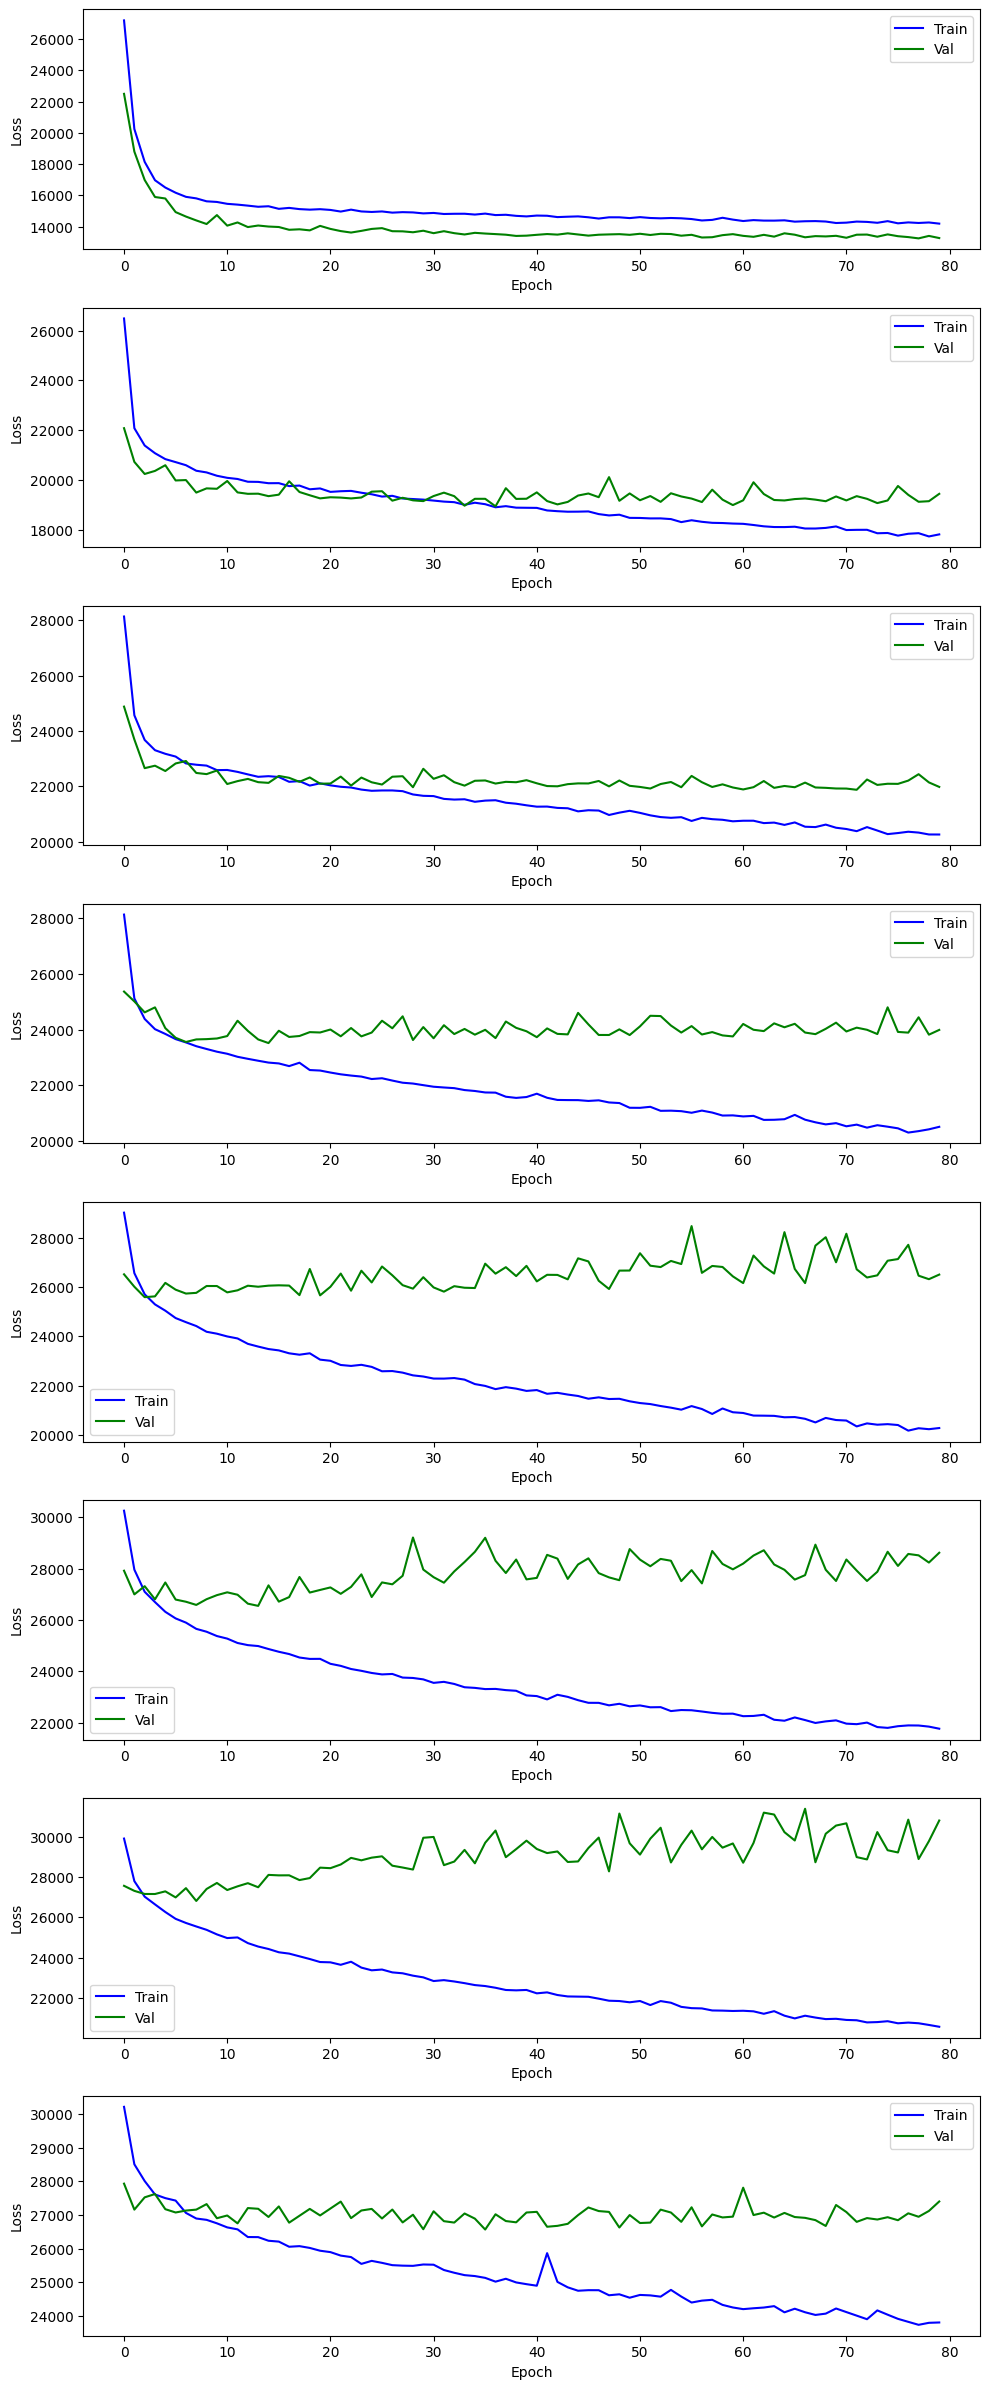

In [7]:
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="forward_")